# now do some ML using the web scraped data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from player_data_expansion import get_all_expanded_player_fight_data

In [3]:
# AWS integration getting file data
df_init = pd.read_csv("fight_data.csv").fillna(pd.NA)

In [4]:
df_init.head()

,Date,fighter1,fighter1_result,method_or_round,fighter2,Venue,Undercard fights,link,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,"Saturday, 10 May 2025",Anthony Cacace,Winner,"TKO, Round 9",Leigh Wood,"Motorpoint Arena, Nottingham, United Kingdom",Ezra Taylor Beat Troy Jones (UD 10) \nLiam Da...,https://box.live/fights/cacace-vs-wood/,23,0,1,28,0,3,178,170.0,35,61,2012,2011
1,"Saturday, 10 May 2025",Erickson Lubin,Winner,"TKO, Round 11",Ardreal Holmes,"Silver Spurs Arena, Kissimmee, FL, United States",Mayeli Flores Beat Nazarena Romero (SD 10),https://box.live/fights/lubin-vs-holmes/,26,0,2,17,0,0,180,188.0,69,35,2013,2016
2,"Saturday, 10 May 2025",Souleymane Cissokho,Winner,"UD, Round 12",Egidijus Kavaliauskas,"Centre de Conference de Sipopo, Malabo, Equato...",Kevin Sadjo Beat Habib Ahmed (KO 3),https://box.live/fights/cissokho-vs-kavaliauskas/,17,0,0,24,1,2,179,175.0,53,79,1991,2013
3,"Friday, 9 May 2025",Dainier Pero,Winner,"UD, Round 10",Cesar Navarro,"Caribe Royale Orlando, Orlando, FL, United States",<NA>,https://box.live/fights/pero-vs-navarro/,10,0,0,13,0,2,188,183.0,80,85,2012,2017
4,"Friday, 9 May 2025",Tommy Fury,Winner,"UD, Round 6",Kenan Hanjalic,"MTK Arena, Budapest, Hungary",Roman Fury Beat Josip Pehar (TKO 4),https://box.live/fights/fury-vs-hanjalic/,10,0,0,5,0,1,183,NaN,40,80,2018,2019


In [5]:
df_init.tail(10)

,Date,fighter1,fighter1_result,method_or_round,fighter2,Venue,Undercard fights,link,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
11,"Thursday, 1 May 2025",Kevin Lerena,Winner,"TKO, Round 3",Serhiy Radchenko,"Sunbet Arena, Pretoria, South Africa",<NA>,https://box.live/fights/lerena-vs-radchenko/,30,0,3,11,0,7,185,186.0,47,45,2011,2014
12,"Sunday, 27 April 2025",Marlon Tapales,Winner,"RTD, Round 3",Jon Jon Jet,"General Santos City, Cotabato del Sur, Philipp...",<NA>,https://box.live/fights/tapales-vs-jet/,39,0,4,15,1,1,163,166.0,0,0,2008,2015
13,"Saturday, 26 April 2025",Chris Eubank Jr,Winner,"UD, Round 12",Conor Benn,"Tottenham Hotspur Stadium, London, United Kingdom",Anthony Yarde Beat Lyndon Arthur (UD 12) \nAa...,https://box.live/fights/eubank-jr-vs-benn/,34,0,3,23,0,0,180,173.0,74,61,2011,2016
14,"Sunday, 20 April 2025",Ben Whittaker,Winner,"TKO, Round 2",Liam Cameron,"Resorts World Arena, Birmingham, United Kingdom",Sam Eggington Beat Lee Cutler (TD 9) \nFrazer...,https://box.live/fights/whittaker-vs-cameron-ii/,8,1,0,23,1,6,191,183.0,63,43,2022,2009
15,"Saturday, 19 April 2025",Dalton Smith,Winner,"UD, Round 12",Mathieu Germain,"Park Community Arena, Sheffield, United Kingdom",Caoimhin Agyarko Beat Ryan Kelly (MD 10) \nJo...,https://box.live/fights/smith-vs-germain/,17,0,0,26,1,2,176,NaN,0,0,2019,2015
16,"Saturday, 19 April 2025",Gabriela Fundora,Winner,"TKO, Round 7",Marilyn Badillo Amaya,"Frontwave Arena, Oceanside, CA, United States",Jorge Perez Beat Charles Conwell (SD 12) \nOl...,https://box.live/fights/fundora-vs-amaya/,15,0,0,19,1,0,175,160.0,0,0,2021,2017
17,"Saturday, 19 April 2025",Sadriddin Akhmedov,Draw,"MD, Round 10",Elias Espadas,"Commerce Casino, Commerce, CA, United States",<NA>,https://box.live/fights/akhmedov-vs-espadas/,15,0,0,23,0,6,175,178.0,0,0,2018,2012
18,"Friday, 18 April 2025",Sergey Kovalev,Winner,"KO, Round 7",Artur Mann,"Yunost Arena, Chelyabinsk, Russian Federation",<NA>,https://box.live/fights/kovalev-vs-mann/,35,1,5,22,0,4,183,185.0,83,59,2009,2015
19,"Sunday, 11 May 2025",Fernando Martinez,Winner,"UD, Round 12",Kazuto Ioka,"Ota-City General Gymnasium, Tokyo, Japan",Hayato Tsutsumi Beat Jaime Arboleda (TKO 3),https://box.live/fights/martinez-vs-ioka-ii/,17,0,0,31,1,3,161,165.0,0,0,2017,2009
20,"Saturday, 10 May 2025",Emanuel Navarrete,Winner,"TD, Round 8",Charly Suarez,"Pechanga Arena, San Diego, CA, United States",Raymond Muratalla Beat Zaur Abdullaev (UD 12)...,https://box.live/fights/navarrete-vs-suarez/,39,1,2,18,0,0,170,168.0,82,56,2012,2019


In [6]:
# ADD BASIC DATA TO SEE IF IT WORKS
df_init = pd.concat([df_init,pd.read_csv("fight_data_backup_basic.csv")], axis=0)
df_init.drop_duplicates(inplace=True)

### start cleaning

In [7]:
df_essentials = df_init.drop(columns=['link','Venue','Date','Undercard fights','fighter1','fighter2'])
df_essentials.head(2)

,fighter1_result,method_or_round,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,Winner,"TKO, Round 9",23.0,0.0,1.0,28.0,0.0,3.0,178.0,170.0,35.0,61.0,2012.0,2011.0
1,Winner,"TKO, Round 11",26.0,0.0,2.0,17.0,0.0,0.0,180.0,188.0,69.0,35.0,2013.0,2016.0


In [8]:
df_staged_cleaning = df_essentials.copy()
df_staged_cleaning.head(2)

,fighter1_result,method_or_round,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,Winner,"TKO, Round 9",23.0,0.0,1.0,28.0,0.0,3.0,178.0,170.0,35.0,61.0,2012.0,2011.0
1,Winner,"TKO, Round 11",26.0,0.0,2.0,17.0,0.0,0.0,180.0,188.0,69.0,35.0,2013.0,2016.0


In [9]:
df_staged_cleaning['method_or_round'] = df_staged_cleaning['method_or_round'].str.split(' ')

In [10]:
# last_rounds = [new_list[2] for new_list in df_staged_cleaning['method_or_round']][:]
# df_staged_cleaning['round'] = last_rounds round includes test bias

df_staged_cleaning.head()

,fighter1_result,method_or_round,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,Winner,"[TKO,, Round, 9]",23.0,0.0,1.0,28.0,0.0,3.0,178.0,170.0,35.0,61.0,2012.0,2011.0
1,Winner,"[TKO,, Round, 11]",26.0,0.0,2.0,17.0,0.0,0.0,180.0,188.0,69.0,35.0,2013.0,2016.0
2,Winner,"[UD,, Round, 12]",17.0,0.0,0.0,24.0,1.0,2.0,179.0,175.0,53.0,79.0,1991.0,2013.0
3,Winner,"[UD,, Round, 10]",10.0,0.0,0.0,13.0,0.0,2.0,188.0,183.0,80.0,85.0,2012.0,2017.0
4,Winner,"[UD,, Round, 6]",10.0,0.0,0.0,5.0,0.0,1.0,183.0,NaN,40.0,80.0,2018.0,2019.0


In [11]:
df_staged_cleaning = df_staged_cleaning.drop(columns='method_or_round')
df_staged_cleaning.head()

,fighter1_result,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,Winner,23.0,0.0,1.0,28.0,0.0,3.0,178.0,170.0,35.0,61.0,2012.0,2011.0
1,Winner,26.0,0.0,2.0,17.0,0.0,0.0,180.0,188.0,69.0,35.0,2013.0,2016.0
2,Winner,17.0,0.0,0.0,24.0,1.0,2.0,179.0,175.0,53.0,79.0,1991.0,2013.0
3,Winner,10.0,0.0,0.0,13.0,0.0,2.0,188.0,183.0,80.0,85.0,2012.0,2017.0
4,Winner,10.0,0.0,0.0,5.0,0.0,1.0,183.0,NaN,40.0,80.0,2018.0,2019.0


### feature engineering swapped values + add to current values

In [12]:

df_staged_swapping = df_staged_cleaning.copy()

fighter2_wins_temp = df_staged_swapping['fighter2_record_wins'].copy()
fighter2_draws_temp = df_staged_swapping['fighter2_record_draws'].copy()
fighter2_losses_temp = df_staged_swapping['fighter2_record_losses'].copy()
fighter2_height_cm_temp = df_staged_swapping['fighter2_height_cm'].copy()
fighter2_ko_percentage_temp = df_staged_swapping['fighter2_ko_percentage'].copy()
fighter2_debut_temp = df_staged_swapping['fighter2_debut'].copy()

df_staged_swapping['fighter2_record_wins'] = df_staged_swapping['fighter1_record_wins']
df_staged_swapping['fighter2_record_draws'] = df_staged_swapping['fighter1_record_draws']
df_staged_swapping['fighter2_record_losses'] = df_staged_swapping['fighter1_record_losses']
df_staged_swapping['fighter2_height_cm'] = df_staged_swapping['fighter1_height_cm']
df_staged_swapping['fighter2_ko_percentage'] = df_staged_swapping['fighter1_ko_percentage']
df_staged_swapping['fighter2_debut'] = df_staged_swapping['fighter1_debut']

df_staged_swapping['fighter1_record_wins'] = fighter2_wins_temp
df_staged_swapping['fighter1_record_draws'] = fighter2_draws_temp
df_staged_swapping['fighter1_record_losses'] = fighter2_losses_temp
df_staged_swapping['fighter1_height_cm'] = fighter2_height_cm_temp
df_staged_swapping['fighter1_ko_percentage'] = fighter2_ko_percentage_temp
df_staged_swapping['fighter1_debut'] = fighter2_debut_temp



def reverse_results(rowval) : 
    if rowval == 'Winner' :
        return 'Loser'
    elif rowval == 'Loser' :
        return 'Winner'
    else :
        return 'Draw'
    
df_staged_swapping['fighter1_result'] = df_staged_swapping['fighter1_result'].apply(reverse_results)


concatenate the matrices

In [13]:
# df_encoded = pd.concat([df_staged_cleaning, df_staged_swapping], axis=0)
# df_encoded

could also feature engineer the ratio between fighters, such as fighter2/fighter1 for height

### encoding

In [14]:
# commented out. this is the original with no swapping
df_encoded = df_staged_cleaning.copy()

In [15]:
# WINNER = 0, LOSER = 1, DRAW = 2
def custom_encoder(value) :
    if value == 'Winner' :
        return 0
    elif value == 'Loser' :
        return 1
    else : return 2
df_encoded['fighter1_result'] = df_encoded['fighter1_result'].apply(custom_encoder)

In [16]:
df_encoded.shape

(33, 13)

In [17]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 11
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fighter1_result         33 non-null     int64  
 1   fighter1_record_wins    21 non-null     float64
 2   fighter1_record_draws   21 non-null     float64
 3   fighter1_record_losses  21 non-null     float64
 4   fighter2_record_wins    21 non-null     float64
 5   fighter2_record_draws   21 non-null     float64
 6   fighter2_record_losses  21 non-null     float64
 7   fighter1_height_cm      21 non-null     float64
 8   fighter2_height_cm      18 non-null     float64
 9   fighter1_ko_percentage  21 non-null     float64
 10  fighter2_ko_percentage  21 non-null     float64
 11  fighter1_debut          21 non-null     float64
 12  fighter2_debut          21 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 3.6 KB


In [18]:
df_encoded = df_encoded.infer_objects()

df_encoded['fighter1_result'] = df_encoded['fighter1_result'].astype('category')

df_encoded['fighter1_record_wins'] = df_encoded['fighter1_record_wins'].astype('Int64')
df_encoded['fighter1_record_draws'] = df_encoded['fighter1_record_draws'].astype('Int64')
df_encoded['fighter1_record_losses'] = df_encoded['fighter1_record_losses'].astype('Int64')
df_encoded['fighter2_record_wins'] = df_encoded['fighter2_record_wins'].astype('Int64')
df_encoded['fighter2_record_draws'] = df_encoded['fighter2_record_draws'].astype('Int64')
df_encoded['fighter2_record_losses'] = df_encoded['fighter1_record_losses'].astype('Int64')
df_encoded['fighter1_height_cm'] = df_encoded['fighter2_height_cm'].astype('Int64')
df_encoded['fighter2_height_cm'] = df_encoded['fighter2_height_cm'].astype('Int64')
df_encoded['fighter1_ko_percentage'] = df_encoded['fighter1_ko_percentage'].astype('Int64')
df_encoded['fighter2_ko_percentage'] = df_encoded['fighter2_ko_percentage'].astype('Int64')
# df_encoded['round'] = df_encoded['round'].astype('Int64') round includes test bias
df_encoded['fighter1_debut'] = df_encoded['fighter1_debut'].astype('Int64')
df_encoded['fighter2_debut'] = df_encoded['fighter1_debut'].astype('Int64')

In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 11
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   fighter1_result         33 non-null     category
 1   fighter1_record_wins    21 non-null     Int64   
 2   fighter1_record_draws   21 non-null     Int64   
 3   fighter1_record_losses  21 non-null     Int64   
 4   fighter2_record_wins    21 non-null     Int64   
 5   fighter2_record_draws   21 non-null     Int64   
 6   fighter2_record_losses  21 non-null     Int64   
 7   fighter1_height_cm      18 non-null     Int64   
 8   fighter2_height_cm      18 non-null     Int64   
 9   fighter1_ko_percentage  21 non-null     Int64   
 10  fighter2_ko_percentage  21 non-null     Int64   
 11  fighter1_debut          21 non-null     Int64   
 12  fighter2_debut          21 non-null     Int64   
dtypes: Int64(12), category(1)
memory usage: 3.9 KB


In [20]:
df_encoded.describe()

,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
count,21.0,21.0,21.0,21.0,21.0,21.0,18.0,18.0,21.0,21.0,21.0,21.0
mean,23.428571,0.238095,1.142857,19.714286,0.333333,1.142857,174.333333,174.333333,33.761905,32.619048,2013.52381,2013.52381
std,13.215791,0.538958,1.525966,6.341473,0.483046,1.525966,8.845072,8.845072,35.365103,34.08882,6.947079,6.947079
min,8.0,0.0,0.0,5.0,0.0,0.0,160.0,160.0,0.0,0.0,1991.0,1991.0
25%,15.0,0.0,0.0,16.0,0.0,0.0,168.0,168.0,0.0,0.0,2011.0,2011.0
50%,19.0,0.0,0.0,21.0,0.0,0.0,174.0,174.0,35.0,35.0,2013.0,2013.0
75%,30.0,0.0,2.0,23.0,1.0,2.0,182.75,182.75,69.0,61.0,2018.0,2018.0
max,62.0,2.0,5.0,31.0,1.0,5.0,188.0,188.0,83.0,85.0,2022.0,2022.0


### tt split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df_encoded.drop(columns=['fighter1_result', "fighter1_ko_percentage", 'fighter2_ko_percentage'])
y = df_encoded['fighter1_result']
y.unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80) # tweak to maker sure that y values contain wins, losses, and draws. ts = .2 and rs =  66
print(y_train.unique())
print(y_test.unique())

[0, 2, 1]
Categories (3, int64): [0, 1, 2]
[0, 2]
Categories (3, int64): [0, 1, 2]


## TRAIN MODEL - XGBoost First

In [24]:
from xgboost import XGBClassifier

In [25]:
xgbc = XGBClassifier(
    objective='multi:softmax',
    random_state=42,
    num_class=3,
    verbosity=1
)

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
y_train = encoder.fit_transform(y_train)

In [28]:
# compute sample weight based on class frequency
class_weights = dict(enumerate(len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train))))
sample_weight = np.array([class_weights[label] for label in y_train])
sample_weight

array([0.36507937, 0.36507937, 0.36507937, 0.36507937, 0.36507937,
       0.36507937, 0.36507937, 0.36507937, 0.36507937, 0.36507937,
       0.36507937, 0.36507937, 0.36507937, 7.66666667, 0.36507937,
       0.36507937, 0.36507937, 0.36507937, 0.36507937, 0.36507937,
       0.36507937, 7.66666667, 0.36507937])

In [29]:
# # no class weighting
# xgbc.fit(X_train, y_train)

# class weighting
xgbc.fit(X_train, y_train, sample_weight=sample_weight)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, ...)

In [30]:
xgbc_preds = xgbc.predict(X_test)
xgbc_preds = encoder.inverse_transform(xgbc_preds)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
print(accuracy_score(y_test, xgbc_preds))

0.9


In [33]:
print(confusion_matrix(y_test, xgbc_preds))

[[9 0]
 [1 0]]


In [34]:
print(classification_report(y_test, xgbc_preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           2       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
xgbc_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### grid search cross validated + XGBoost Classifier - same rseult as initial one

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
eval_set = [(X, y)] # validation set for early stopping

In [38]:
xgbc_model2 = XGBClassifier(
    objective='multi:softmax',
    random_state=42,
    num_class=3,
    verbosity=1,
    eval_metric="mlogloss"
)

In [39]:
param_grid = {
    "subsample":[0.75, 1],
     "colsample_bytree":[0.75, 1],
     "max_depth":[2, 6],
     "min_child_weight":[1, 2,3],
     "learning_rate":[1, 0.1, 0.01],
}

In [40]:
xgbc_grid = GridSearchCV(
    xgbc_model2,
    param_grid,
    cv=3,
    scoring="f1"
)

In [41]:
xgbc_grid.fit(X_train,y_train,eval_set=eval_set,verbose=1)

[0]	validation_0-mlogloss:0.48276
[1]	validation_0-mlogloss:0.40228


[2]	validation_0-mlogloss:0.37431
[3]	validation_0-mlogloss:0.37848
[4]	validation_0-mlogloss:0.37150
[5]	validation_0-mlogloss:0.37383
[6]	validation_0-mlogloss:0.37674
[7]	validation_0-mlogloss:0.38004
[8]	validation_0-mlogloss:0.37142
[9]	validation_0-mlogloss:0.37086
[10]	validation_0-mlogloss:0.37715


c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[11]	validation_0-mlogloss:0.38016
[12]	validation_0-mlogloss:0.38170
[13]	validation_0-mlogloss:0.38209
[14]	validation_0-mlogloss:0.38311
[15]	validation_0-mlogloss:0.38432
[16]	validation_0-mlogloss:0.38747
[17]	validation_0-mlogloss:0.39015
[18]	validation_0-mlogloss:0.39199
[19]	validation_0-mlogloss:0.39452
[20]	validation_0-mlogloss:0.39984
[21]	validation_0-mlogloss:0.39829
[22]	validation_0-mlogloss:0.39899
[23]	validation_0-mlogloss:0.40048
[24]	validation_0-mlogloss:0.40272
[25]	validation_0-mlogloss:0.40260
[26]	validation_0-mlogloss:0.40571
[27]	validation_0-mlogloss:0.39553
[28]	validation_0-mlogloss:0.39451
[29]	validation_0-mlogloss:0.39353
[30]	validation_0-mlogloss:0.38466
[31]	validation_0-mlogloss:0.38867
[32]	validation_0-mlogloss:0.38811
[33]	validation_0-mlogloss:0.38764
[34]	validation_0-mlogloss:0.39469
[35]	validation_0-mlogloss:0.39657
[36]	validation_0-mlogloss:0.40092
[37]	validation_0-mlogloss:0.40420
[38]	validation_0-mlogloss:0.40438
[39]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[2]	validation_0-mlogloss:0.35876
[3]	validation_0-mlogloss:0.35679
[4]	validation_0-mlogloss:0.34830
[5]	validation_0-mlogloss:0.35541
[6]	validation_0-mlogloss:0.35764
[7]	validation_0-mlogloss:0.36008
[8]	validation_0-mlogloss:0.36251
[9]	validation_0-mlogloss:0.36488
[10]	validation_0-mlogloss:0.36718
[11]	validation_0-mlogloss:0.36942
[12]	validation_0-mlogloss:0.37159
[13]	validation_0-mlogloss:0.37370
[14]	validation_0-mlogloss:0.37574
[15]	validation_0-mlogloss:0.37773
[16]	validation_0-mlogloss:0.37967
[17]	validation_0-mlogloss:0.38155
[18]	validation_0-mlogloss:0.38338
[19]	validation_0-mlogloss:0.38516
[20]	validation_0-mlogloss:0.38690
[21]	validation_0-mlogloss:0.38859
[22]	validation_0-mlogloss:0.39024
[23]	validation_0-mlogloss:0.39185
[24]	validation_0-mlogloss:0.39342
[25]	validation_0-mlogloss:0.39495
[26]	validation_0-mlogloss:0.39645
[27]	validation_0-mlogloss:0.39792
[28]	validation_0-mlogloss:0.39935
[29]	validation_0-mlogloss:0.40075
[30]	validation_0-mlogloss:0

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[21]	validation_0-mlogloss:0.36543
[22]	validation_0-mlogloss:0.36543
[23]	validation_0-mlogloss:0.36543
[24]	validation_0-mlogloss:0.36543
[25]	validation_0-mlogloss:0.36543
[26]	validation_0-mlogloss:0.36543
[27]	validation_0-mlogloss:0.36543
[28]	validation_0-mlogloss:0.36543
[29]	validation_0-mlogloss:0.36543
[30]	validation_0-mlogloss:0.36543
[31]	validation_0-mlogloss:0.36543
[32]	validation_0-mlogloss:0.36543
[33]	validation_0-mlogloss:0.36543
[34]	validation_0-mlogloss:0.36543
[35]	validation_0-mlogloss:0.36543
[36]	validation_0-mlogloss:0.36543
[37]	validation_0-mlogloss:0.36543
[38]	validation_0-mlogloss:0.36543
[39]	validation_0-mlogloss:0.36543
[40]	validation_0-mlogloss:0.36543
[41]	validation_0-mlogloss:0.36543
[42]	validation_0-mlogloss:0.36543
[43]	validation_0-mlogloss:0.36543
[44]	validation_0-mlogloss:0.36543
[45]	validation_0-mlogloss:0.36543
[46]	validation_0-mlogloss:0.36543
[47]	validation_0-mlogloss:0.36543
[48]	validation_0-mlogloss:0.36543
[49]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[94]	validation_0-mlogloss:0.32912
[95]	validation_0-mlogloss:0.33135
[96]	validation_0-mlogloss:0.33465
[97]	validation_0-mlogloss:0.33293
[98]	validation_0-mlogloss:0.33357
[99]	validation_0-mlogloss:0.33295
[0]	validation_0-mlogloss:0.46817
[1]	validation_0-mlogloss:0.38262
[2]	validation_0-mlogloss:0.36506
[3]	validation_0-mlogloss:0.36157
[4]	validation_0-mlogloss:0.36084
[5]	validation_0-mlogloss:0.36114
[6]	validation_0-mlogloss:0.36172
[7]	validation_0-mlogloss:0.36228
[8]	validation_0-mlogloss:0.36274
[9]	validation_0-mlogloss:0.36274
[10]	validation_0-mlogloss:0.36274
[11]	validation_0-mlogloss:0.36274
[12]	validation_0-mlogloss:0.36274
[13]	validation_0-mlogloss:0.36274
[14]	validation_0-mlogloss:0.36274
[15]	validation_0-mlogloss:0.36274
[16]	validation_0-mlogloss:0.36274
[17]	validation_0-mlogloss:0.36274
[18]	validation_0-mlogloss:0.36274
[19]	validation_0-mlogloss:0.36274
[20]	validation_0-mlogloss:0.36274
[21]	validation_0-mlogloss:0.36274
[22]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[25]	validation_0-mlogloss:0.33763
[26]	validation_0-mlogloss:0.33763
[27]	validation_0-mlogloss:0.33763
[28]	validation_0-mlogloss:0.33763
[29]	validation_0-mlogloss:0.33763
[30]	validation_0-mlogloss:0.33763
[31]	validation_0-mlogloss:0.33763
[32]	validation_0-mlogloss:0.33763
[33]	validation_0-mlogloss:0.33763
[34]	validation_0-mlogloss:0.33763
[35]	validation_0-mlogloss:0.33763
[36]	validation_0-mlogloss:0.33763
[37]	validation_0-mlogloss:0.33763
[38]	validation_0-mlogloss:0.33763
[39]	validation_0-mlogloss:0.33763
[40]	validation_0-mlogloss:0.33763
[41]	validation_0-mlogloss:0.33763
[42]	validation_0-mlogloss:0.33763
[43]	validation_0-mlogloss:0.33763
[44]	validation_0-mlogloss:0.33763
[45]	validation_0-mlogloss:0.33763
[46]	validation_0-mlogloss:0.33763
[47]	validation_0-mlogloss:0.33763
[48]	validation_0-mlogloss:0.33763
[49]	validation_0-mlogloss:0.33763
[50]	validation_0-mlogloss:0.33763
[51]	validation_0-mlogloss:0.33763
[52]	validation_0-mlogloss:0.33763
[53]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[98]	validation_0-mlogloss:0.36714
[99]	validation_0-mlogloss:0.36714
[0]	validation_0-mlogloss:0.50391
[1]	validation_0-mlogloss:0.40807
[2]	validation_0-mlogloss:0.39282
[3]	validation_0-mlogloss:0.38904
[4]	validation_0-mlogloss:0.37470
[5]	validation_0-mlogloss:0.36835
[6]	validation_0-mlogloss:0.36835
[7]	validation_0-mlogloss:0.36835
[8]	validation_0-mlogloss:0.36835
[9]	validation_0-mlogloss:0.36835
[10]	validation_0-mlogloss:0.36835
[11]	validation_0-mlogloss:0.36835
[12]	validation_0-mlogloss:0.36835
[13]	validation_0-mlogloss:0.36835
[14]	validation_0-mlogloss:0.36835
[15]	validation_0-mlogloss:0.36835
[16]	validation_0-mlogloss:0.36835
[17]	validation_0-mlogloss:0.36835
[18]	validation_0-mlogloss:0.36835
[19]	validation_0-mlogloss:0.36835
[20]	validation_0-mlogloss:0.36835
[21]	validation_0-mlogloss:0.36835
[22]	validation_0-mlogloss:0.36835
[23]	validation_0-mlogloss:0.36835
[24]	validation_0-mlogloss:0.36835
[25]	validation_0-mlogloss:0.36835
[26]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.38545
[2]	validation_0-mlogloss:0.37676
[3]	validation_0-mlogloss:0.37416
[4]	validation_0-mlogloss:0.37416
[5]	validation_0-mlogloss:0.37416
[6]	validation_0-mlogloss:0.37416
[7]	validation_0-mlogloss:0.37416
[8]	validation_0-mlogloss:0.37416
[9]	validation_0-mlogloss:0.37416
[10]	validation_0-mlogloss:0.37416
[11]	validation_0-mlogloss:0.37416
[12]	validation_0-mlogloss:0.37416
[13]	validation_0-mlogloss:0.37416
[14]	validation_0-mlogloss:0.37416
[15]	validation_0-mlogloss:0.37416
[16]	validation_0-mlogloss:0.37416
[17]	validation_0-mlogloss:0.37416
[18]	validation_0-mlogloss:0.37416
[19]	validation_0-mlogloss:0.37416
[20]	validation_0-mlogloss:0.37416
[21]	validation_0-mlogloss:0.37416
[22]	validation_0-mlogloss:0.37416
[23]	validation_0-mlogloss:0.37416
[24]	validation_0-mlogloss:0.37416
[25]	validation_0-mlogloss:0.37416
[26]	validation_0-mlogloss:0.37416
[27]	validation_0-mlogloss:0.37416
[28]	validation_0-mlogloss:0.37416
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.40228
[2]	validation_0-mlogloss:0.37431
[3]	validation_0-mlogloss:0.37848
[4]	validation_0-mlogloss:0.37150
[5]	validation_0-mlogloss:0.37383
[6]	validation_0-mlogloss:0.37674
[7]	validation_0-mlogloss:0.38004
[8]	validation_0-mlogloss:0.37142
[9]	validation_0-mlogloss:0.37086
[10]	validation_0-mlogloss:0.37715
[11]	validation_0-mlogloss:0.38016
[12]	validation_0-mlogloss:0.38170
[13]	validation_0-mlogloss:0.38209
[14]	validation_0-mlogloss:0.38311
[15]	validation_0-mlogloss:0.38432
[16]	validation_0-mlogloss:0.38747
[17]	validation_0-mlogloss:0.39015
[18]	validation_0-mlogloss:0.39199
[19]	validation_0-mlogloss:0.39452
[20]	validation_0-mlogloss:0.39984
[21]	validation_0-mlogloss:0.39829
[22]	validation_0-mlogloss:0.39899
[23]	validation_0-mlogloss:0.40048
[24]	validation_0-mlogloss:0.40272
[25]	validation_0-mlogloss:0.40260
[26]	validation_0-mlogloss:0.40571
[27]	validation_0-mlogloss:0.39553
[28]	validation_0-mlogloss:0.39451
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[0]	validation_0-mlogloss:0.44997
[1]	validation_0-mlogloss:0.36802
[2]	validation_0-mlogloss:0.35876
[3]	validation_0-mlogloss:0.35679
[4]	validation_0-mlogloss:0.34830
[5]	validation_0-mlogloss:0.35541
[6]	validation_0-mlogloss:0.35764
[7]	validation_0-mlogloss:0.36008
[8]	validation_0-mlogloss:0.36251
[9]	validation_0-mlogloss:0.36488
[10]	validation_0-mlogloss:0.36718
[11]	validation_0-mlogloss:0.36942
[12]	validation_0-mlogloss:0.37159
[13]	validation_0-mlogloss:0.37370
[14]	validation_0-mlogloss:0.37574
[15]	validation_0-mlogloss:0.37773
[16]	validation_0-mlogloss:0.37967
[17]	validation_0-mlogloss:0.38155
[18]	validation_0-mlogloss:0.38338
[19]	validation_0-mlogloss:0.38516
[20]	validation_0-mlogloss:0.38690
[21]	validation_0-mlogloss:0.38859
[22]	validation_0-mlogloss:0.39024
[23]	validation_0-mlogloss:0.39185
[24]	validation_0-mlogloss:0.39342
[25]	validation_0-mlogloss:0.39495
[26]	validation_0-mlogloss:0.39645
[27]	validation_0-mlogloss:0.39792
[28]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.36313
[2]	validation_0-mlogloss:0.33557
[3]	validation_0-mlogloss:0.30255
[4]	validation_0-mlogloss:0.29145
[5]	validation_0-mlogloss:0.28372
[6]	validation_0-mlogloss:0.28681
[7]	validation_0-mlogloss:0.28491
[8]	validation_0-mlogloss:0.28797
[9]	validation_0-mlogloss:0.28681
[10]	validation_0-mlogloss:0.29079
[11]	validation_0-mlogloss:0.29022
[12]	validation_0-mlogloss:0.29432
[13]	validation_0-mlogloss:0.29422
[14]	validation_0-mlogloss:0.29802
[15]	validation_0-mlogloss:0.29829
[16]	validation_0-mlogloss:0.30215
[17]	validation_0-mlogloss:0.30272
[18]	validation_0-mlogloss:0.30693
[19]	validation_0-mlogloss:0.31079
[20]	validation_0-mlogloss:0.31507
[21]	validation_0-mlogloss:0.31621
[22]	validation_0-mlogloss:0.32055
[23]	validation_0-mlogloss:0.32488
[24]	validation_0-mlogloss:0.32922
[25]	validation_0-mlogloss:0.33087
[26]	validation_0-mlogloss:0.33525
[27]	validation_0-mlogloss:0.33999
[28]	validation_0-mlogloss:0.34441
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[6]	validation_0-mlogloss:0.36172
[7]	validation_0-mlogloss:0.36228
[8]	validation_0-mlogloss:0.36274
[9]	validation_0-mlogloss:0.36274
[10]	validation_0-mlogloss:0.36274
[11]	validation_0-mlogloss:0.36274
[12]	validation_0-mlogloss:0.36274
[13]	validation_0-mlogloss:0.36274
[14]	validation_0-mlogloss:0.36274
[15]	validation_0-mlogloss:0.36274
[16]	validation_0-mlogloss:0.36274
[17]	validation_0-mlogloss:0.36274
[18]	validation_0-mlogloss:0.36274
[19]	validation_0-mlogloss:0.36274
[20]	validation_0-mlogloss:0.36274
[21]	validation_0-mlogloss:0.36274
[22]	validation_0-mlogloss:0.36274
[23]	validation_0-mlogloss:0.36274
[24]	validation_0-mlogloss:0.36274
[25]	validation_0-mlogloss:0.36274
[26]	validation_0-mlogloss:0.36274
[27]	validation_0-mlogloss:0.36274
[28]	validation_0-mlogloss:0.36274
[29]	validation_0-mlogloss:0.36274
[30]	validation_0-mlogloss:0.36274
[31]	validation_0-mlogloss:0.36274
[32]	validation_0-mlogloss:0.36274
[33]	validation_0-mlogloss:0.36274
[34]	validation_0-mloglo

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[0]	validation_0-mlogloss:0.48308
[1]	validation_0-mlogloss:0.40101
[2]	validation_0-mlogloss:0.37908
[3]	validation_0-mlogloss:0.37908
[4]	validation_0-mlogloss:0.37082
[5]	validation_0-mlogloss:0.37082
[6]	validation_0-mlogloss:0.37082
[7]	validation_0-mlogloss:0.37082
[8]	validation_0-mlogloss:0.37082
[9]	validation_0-mlogloss:0.37082
[10]	validation_0-mlogloss:0.37082
[11]	validation_0-mlogloss:0.37082
[12]	validation_0-mlogloss:0.37082
[13]	validation_0-mlogloss:0.37082
[14]	validation_0-mlogloss:0.37082
[15]	validation_0-mlogloss:0.37082
[16]	validation_0-mlogloss:0.37082
[17]	validation_0-mlogloss:0.37082
[18]	validation_0-mlogloss:0.37082
[19]	validation_0-mlogloss:0.37082
[20]	validation_0-mlogloss:0.37082
[21]	validation_0-mlogloss:0.37082
[22]	validation_0-mlogloss:0.37082
[23]	validation_0-mlogloss:0.37082
[24]	validation_0-mlogloss:0.37082
[25]	validation_0-mlogloss:0.37082
[26]	validation_0-mlogloss:0.37082
[27]	validation_0-mlogloss:0.37082
[28]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[20]	validation_0-mlogloss:0.37416
[21]	validation_0-mlogloss:0.37416
[22]	validation_0-mlogloss:0.37416
[23]	validation_0-mlogloss:0.37416
[24]	validation_0-mlogloss:0.37416
[25]	validation_0-mlogloss:0.37416
[26]	validation_0-mlogloss:0.37416
[27]	validation_0-mlogloss:0.37416
[28]	validation_0-mlogloss:0.37416
[29]	validation_0-mlogloss:0.37416
[30]	validation_0-mlogloss:0.37416
[31]	validation_0-mlogloss:0.37416
[32]	validation_0-mlogloss:0.37416
[33]	validation_0-mlogloss:0.37416
[34]	validation_0-mlogloss:0.37416
[35]	validation_0-mlogloss:0.37416
[36]	validation_0-mlogloss:0.37416
[37]	validation_0-mlogloss:0.37416
[38]	validation_0-mlogloss:0.37416
[39]	validation_0-mlogloss:0.37416
[40]	validation_0-mlogloss:0.37416
[41]	validation_0-mlogloss:0.37416
[42]	validation_0-mlogloss:0.37416
[43]	validation_0-mlogloss:0.37416
[44]	validation_0-mlogloss:0.37416
[45]	validation_0-mlogloss:0.37416
[46]	validation_0-mlogloss:0.37416
[47]	validation_0-mlogloss:0.37416
[48]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.93116
[2]	validation_0-mlogloss:0.86015
[3]	validation_0-mlogloss:0.80445
[4]	validation_0-mlogloss:0.75099
[5]	validation_0-mlogloss:0.70044
[6]	validation_0-mlogloss:0.66252
[7]	validation_0-mlogloss:0.62767
[8]	validation_0-mlogloss:0.59581
[9]	validation_0-mlogloss:0.56569
[10]	validation_0-mlogloss:0.54150
[11]	validation_0-mlogloss:0.51981
[12]	validation_0-mlogloss:0.50269
[13]	validation_0-mlogloss:0.48609
[14]	validation_0-mlogloss:0.47018
[15]	validation_0-mlogloss:0.45723
[16]	validation_0-mlogloss:0.44279
[17]	validation_0-mlogloss:0.43126
[18]	validation_0-mlogloss:0.42134
[19]	validation_0-mlogloss:0.41316
[20]	validation_0-mlogloss:0.40808
[21]	validation_0-mlogloss:0.40156
[22]	validation_0-mlogloss:0.39525
[23]	validation_0-mlogloss:0.39098
[24]	validation_0-mlogloss:0.38726
[25]	validation_0-mlogloss:0.38105
[26]	validation_0-mlogloss:0.37819
[27]	validation_0-mlogloss:0.37207
[28]	validation_0-mlogloss:0.36672
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[89]	validation_0-mlogloss:0.31126
[90]	validation_0-mlogloss:0.31114
[91]	validation_0-mlogloss:0.31151
[92]	validation_0-mlogloss:0.31141
[93]	validation_0-mlogloss:0.31098
[94]	validation_0-mlogloss:0.31052
[95]	validation_0-mlogloss:0.31052
[96]	validation_0-mlogloss:0.31115
[97]	validation_0-mlogloss:0.31143
[98]	validation_0-mlogloss:0.31171
[99]	validation_0-mlogloss:0.31189
[0]	validation_0-mlogloss:1.00020
[1]	validation_0-mlogloss:0.91646
[2]	validation_0-mlogloss:0.84730
[3]	validation_0-mlogloss:0.78752
[4]	validation_0-mlogloss:0.73335
[5]	validation_0-mlogloss:0.68881
[6]	validation_0-mlogloss:0.64974
[7]	validation_0-mlogloss:0.61483
[8]	validation_0-mlogloss:0.58275
[9]	validation_0-mlogloss:0.55543
[10]	validation_0-mlogloss:0.53166
[11]	validation_0-mlogloss:0.51073
[12]	validation_0-mlogloss:0.49202
[13]	validation_0-mlogloss:0.47591
[14]	validation_0-mlogloss:0.46140
[15]	validation_0-mlogloss:0.44797
[16]	validation_0-mlogloss:0.43704
[17]	validation_0-mlogloss:0.4

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.93091
[2]	validation_0-mlogloss:0.86481
[3]	validation_0-mlogloss:0.80480
[4]	validation_0-mlogloss:0.75239
[5]	validation_0-mlogloss:0.70695
[6]	validation_0-mlogloss:0.66518
[7]	validation_0-mlogloss:0.62847
[8]	validation_0-mlogloss:0.59591
[9]	validation_0-mlogloss:0.56611
[10]	validation_0-mlogloss:0.54065
[11]	validation_0-mlogloss:0.51677
[12]	validation_0-mlogloss:0.49504
[13]	validation_0-mlogloss:0.47585
[14]	validation_0-mlogloss:0.45822
[15]	validation_0-mlogloss:0.44301
[16]	validation_0-mlogloss:0.42857
[17]	validation_0-mlogloss:0.41516
[18]	validation_0-mlogloss:0.40320
[19]	validation_0-mlogloss:0.39211
[20]	validation_0-mlogloss:0.38184
[21]	validation_0-mlogloss:0.37261
[22]	validation_0-mlogloss:0.36462
[23]	validation_0-mlogloss:0.35667
[24]	validation_0-mlogloss:0.34943
[25]	validation_0-mlogloss:0.34283
[26]	validation_0-mlogloss:0.33638
[27]	validation_0-mlogloss:0.33060
[28]	validation_0-mlogloss:0.32521
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.94102
[2]	validation_0-mlogloss:0.87943
[3]	validation_0-mlogloss:0.82213
[4]	validation_0-mlogloss:0.76413
[5]	validation_0-mlogloss:0.72039
[6]	validation_0-mlogloss:0.68360
[7]	validation_0-mlogloss:0.64511
[8]	validation_0-mlogloss:0.61758
[9]	validation_0-mlogloss:0.58522
[10]	validation_0-mlogloss:0.56042
[11]	validation_0-mlogloss:0.53611
[12]	validation_0-mlogloss:0.51590
[13]	validation_0-mlogloss:0.49817
[14]	validation_0-mlogloss:0.48350
[15]	validation_0-mlogloss:0.47056
[16]	validation_0-mlogloss:0.45486
[17]	validation_0-mlogloss:0.44679
[18]	validation_0-mlogloss:0.43493
[19]	validation_0-mlogloss:0.42369
[20]	validation_0-mlogloss:0.41751
[21]	validation_0-mlogloss:0.40853
[22]	validation_0-mlogloss:0.40233
[23]	validation_0-mlogloss:0.39993
[24]	validation_0-mlogloss:0.39253
[25]	validation_0-mlogloss:0.38714
[26]	validation_0-mlogloss:0.38257
[27]	validation_0-mlogloss:0.37682
[28]	validation_0-mlogloss:0.37365
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.93412
[2]	validation_0-mlogloss:0.86874
[3]	validation_0-mlogloss:0.81031
[4]	validation_0-mlogloss:0.75882
[5]	validation_0-mlogloss:0.71341
[6]	validation_0-mlogloss:0.67288
[7]	validation_0-mlogloss:0.63699
[8]	validation_0-mlogloss:0.60524
[9]	validation_0-mlogloss:0.57630
[10]	validation_0-mlogloss:0.55036
[11]	validation_0-mlogloss:0.52763
[12]	validation_0-mlogloss:0.50658
[13]	validation_0-mlogloss:0.48762
[14]	validation_0-mlogloss:0.47159
[15]	validation_0-mlogloss:0.45715
[16]	validation_0-mlogloss:0.44347
[17]	validation_0-mlogloss:0.43103
[18]	validation_0-mlogloss:0.41988
[19]	validation_0-mlogloss:0.41030
[20]	validation_0-mlogloss:0.40121
[21]	validation_0-mlogloss:0.39344
[22]	validation_0-mlogloss:0.38600
[23]	validation_0-mlogloss:0.37969
[24]	validation_0-mlogloss:0.37357
[25]	validation_0-mlogloss:0.36842
[26]	validation_0-mlogloss:0.36335
[27]	validation_0-mlogloss:0.35933
[28]	validation_0-mlogloss:0.35550
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[7]	validation_0-mlogloss:0.64872
[8]	validation_0-mlogloss:0.62329
[9]	validation_0-mlogloss:0.59396
[10]	validation_0-mlogloss:0.56985
[11]	validation_0-mlogloss:0.55430
[12]	validation_0-mlogloss:0.53517
[13]	validation_0-mlogloss:0.51822
[14]	validation_0-mlogloss:0.50540
[15]	validation_0-mlogloss:0.49428
[16]	validation_0-mlogloss:0.47889
[17]	validation_0-mlogloss:0.47437
[18]	validation_0-mlogloss:0.46909
[19]	validation_0-mlogloss:0.46019
[20]	validation_0-mlogloss:0.45671
[21]	validation_0-mlogloss:0.45291
[22]	validation_0-mlogloss:0.44670
[23]	validation_0-mlogloss:0.44390
[24]	validation_0-mlogloss:0.44084
[25]	validation_0-mlogloss:0.43753
[26]	validation_0-mlogloss:0.43408
[27]	validation_0-mlogloss:0.43158
[28]	validation_0-mlogloss:0.42570
[29]	validation_0-mlogloss:0.42297
[30]	validation_0-mlogloss:0.41937
[31]	validation_0-mlogloss:0.41630
[32]	validation_0-mlogloss:0.41443
[33]	validation_0-mlogloss:0.41112
[34]	validation_0-mlogloss:0.40745
[35]	validation_0-mlogl

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[75]	validation_0-mlogloss:0.37214
[76]	validation_0-mlogloss:0.37214
[77]	validation_0-mlogloss:0.37214
[78]	validation_0-mlogloss:0.37214
[79]	validation_0-mlogloss:0.37214
[80]	validation_0-mlogloss:0.37214
[81]	validation_0-mlogloss:0.37214
[82]	validation_0-mlogloss:0.37214
[83]	validation_0-mlogloss:0.37214
[84]	validation_0-mlogloss:0.37214
[85]	validation_0-mlogloss:0.37214
[86]	validation_0-mlogloss:0.37214
[87]	validation_0-mlogloss:0.37214
[88]	validation_0-mlogloss:0.37214
[89]	validation_0-mlogloss:0.37214
[90]	validation_0-mlogloss:0.37214
[91]	validation_0-mlogloss:0.37214
[92]	validation_0-mlogloss:0.37214
[93]	validation_0-mlogloss:0.37214
[94]	validation_0-mlogloss:0.37214
[95]	validation_0-mlogloss:0.37214
[96]	validation_0-mlogloss:0.37214
[97]	validation_0-mlogloss:0.37214
[98]	validation_0-mlogloss:0.37214
[99]	validation_0-mlogloss:0.37214
[0]	validation_0-mlogloss:1.00924
[1]	validation_0-mlogloss:0.93268
[2]	validation_0-mlogloss:0.86663
[3]	validation_0-mloglo

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.93116
[2]	validation_0-mlogloss:0.86015
[3]	validation_0-mlogloss:0.80445
[4]	validation_0-mlogloss:0.75099
[5]	validation_0-mlogloss:0.70044
[6]	validation_0-mlogloss:0.66252
[7]	validation_0-mlogloss:0.62767
[8]	validation_0-mlogloss:0.59581
[9]	validation_0-mlogloss:0.56569
[10]	validation_0-mlogloss:0.54150
[11]	validation_0-mlogloss:0.51981
[12]	validation_0-mlogloss:0.50269
[13]	validation_0-mlogloss:0.48609
[14]	validation_0-mlogloss:0.47018
[15]	validation_0-mlogloss:0.45723
[16]	validation_0-mlogloss:0.44279
[17]	validation_0-mlogloss:0.43126
[18]	validation_0-mlogloss:0.42134
[19]	validation_0-mlogloss:0.41316
[20]	validation_0-mlogloss:0.40808
[21]	validation_0-mlogloss:0.40156
[22]	validation_0-mlogloss:0.39525
[23]	validation_0-mlogloss:0.39098
[24]	validation_0-mlogloss:0.38726
[25]	validation_0-mlogloss:0.38105
[26]	validation_0-mlogloss:0.37819
[27]	validation_0-mlogloss:0.37207
[28]	validation_0-mlogloss:0.36672
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.91646
[2]	validation_0-mlogloss:0.84730
[3]	validation_0-mlogloss:0.78752
[4]	validation_0-mlogloss:0.73335
[5]	validation_0-mlogloss:0.68881
[6]	validation_0-mlogloss:0.64974
[7]	validation_0-mlogloss:0.61483
[8]	validation_0-mlogloss:0.58275
[9]	validation_0-mlogloss:0.55543
[10]	validation_0-mlogloss:0.53166
[11]	validation_0-mlogloss:0.51073
[12]	validation_0-mlogloss:0.49202
[13]	validation_0-mlogloss:0.47591
[14]	validation_0-mlogloss:0.46140
[15]	validation_0-mlogloss:0.44797
[16]	validation_0-mlogloss:0.43704
[17]	validation_0-mlogloss:0.42471
[18]	validation_0-mlogloss:0.41594
[19]	validation_0-mlogloss:0.40892
[20]	validation_0-mlogloss:0.40220
[21]	validation_0-mlogloss:0.39704
[22]	validation_0-mlogloss:0.39121
[23]	validation_0-mlogloss:0.38621
[24]	validation_0-mlogloss:0.38271
[25]	validation_0-mlogloss:0.37889
[26]	validation_0-mlogloss:0.37629
[27]	validation_0-mlogloss:0.37431
[28]	validation_0-mlogloss:0.37278
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[94]	validation_0-mlogloss:0.27301
[95]	validation_0-mlogloss:0.27323
[96]	validation_0-mlogloss:0.27344
[97]	validation_0-mlogloss:0.27327
[98]	validation_0-mlogloss:0.27338
[99]	validation_0-mlogloss:0.27359
[0]	validation_0-mlogloss:1.01050
[1]	validation_0-mlogloss:0.93110
[2]	validation_0-mlogloss:0.85798
[3]	validation_0-mlogloss:0.79789
[4]	validation_0-mlogloss:0.74627
[5]	validation_0-mlogloss:0.69759
[6]	validation_0-mlogloss:0.65875
[7]	validation_0-mlogloss:0.62488
[8]	validation_0-mlogloss:0.59192
[9]	validation_0-mlogloss:0.56279
[10]	validation_0-mlogloss:0.54050
[11]	validation_0-mlogloss:0.52327
[12]	validation_0-mlogloss:0.50699
[13]	validation_0-mlogloss:0.49107
[14]	validation_0-mlogloss:0.47717
[15]	validation_0-mlogloss:0.46642
[16]	validation_0-mlogloss:0.45249
[17]	validation_0-mlogloss:0.44519
[18]	validation_0-mlogloss:0.43720
[19]	validation_0-mlogloss:0.43140
[20]	validation_0-mlogloss:0.42624
[21]	validation_0-mlogloss:0.41968
[22]	validation_0-mlogloss:0.4

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.94102
[2]	validation_0-mlogloss:0.87943
[3]	validation_0-mlogloss:0.82213
[4]	validation_0-mlogloss:0.76413
[5]	validation_0-mlogloss:0.72039
[6]	validation_0-mlogloss:0.68360
[7]	validation_0-mlogloss:0.64511
[8]	validation_0-mlogloss:0.61758
[9]	validation_0-mlogloss:0.58522
[10]	validation_0-mlogloss:0.56042
[11]	validation_0-mlogloss:0.53611
[12]	validation_0-mlogloss:0.51590
[13]	validation_0-mlogloss:0.49817
[14]	validation_0-mlogloss:0.48350
[15]	validation_0-mlogloss:0.47056
[16]	validation_0-mlogloss:0.45486
[17]	validation_0-mlogloss:0.44679
[18]	validation_0-mlogloss:0.43493
[19]	validation_0-mlogloss:0.42369
[20]	validation_0-mlogloss:0.41751
[21]	validation_0-mlogloss:0.40853
[22]	validation_0-mlogloss:0.40233
[23]	validation_0-mlogloss:0.39993
[24]	validation_0-mlogloss:0.39253
[25]	validation_0-mlogloss:0.38714
[26]	validation_0-mlogloss:0.38257
[27]	validation_0-mlogloss:0.37682
[28]	validation_0-mlogloss:0.37365
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.93412
[2]	validation_0-mlogloss:0.86874
[3]	validation_0-mlogloss:0.81031
[4]	validation_0-mlogloss:0.75882
[5]	validation_0-mlogloss:0.71341
[6]	validation_0-mlogloss:0.67288
[7]	validation_0-mlogloss:0.63699
[8]	validation_0-mlogloss:0.60524
[9]	validation_0-mlogloss:0.57630
[10]	validation_0-mlogloss:0.55036
[11]	validation_0-mlogloss:0.52763
[12]	validation_0-mlogloss:0.50658
[13]	validation_0-mlogloss:0.48762
[14]	validation_0-mlogloss:0.47159
[15]	validation_0-mlogloss:0.45715
[16]	validation_0-mlogloss:0.44347
[17]	validation_0-mlogloss:0.43103
[18]	validation_0-mlogloss:0.41988
[19]	validation_0-mlogloss:0.41030
[20]	validation_0-mlogloss:0.40121
[21]	validation_0-mlogloss:0.39344
[22]	validation_0-mlogloss:0.38600
[23]	validation_0-mlogloss:0.37969
[24]	validation_0-mlogloss:0.37357
[25]	validation_0-mlogloss:0.36842
[26]	validation_0-mlogloss:0.36335
[27]	validation_0-mlogloss:0.35933
[28]	validation_0-mlogloss:0.35550
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.93978
[2]	validation_0-mlogloss:0.87895
[3]	validation_0-mlogloss:0.82442
[4]	validation_0-mlogloss:0.76803
[5]	validation_0-mlogloss:0.72209
[6]	validation_0-mlogloss:0.68689
[7]	validation_0-mlogloss:0.64872
[8]	validation_0-mlogloss:0.62329
[9]	validation_0-mlogloss:0.59396
[10]	validation_0-mlogloss:0.56985
[11]	validation_0-mlogloss:0.55430
[12]	validation_0-mlogloss:0.53517
[13]	validation_0-mlogloss:0.51822
[14]	validation_0-mlogloss:0.50540
[15]	validation_0-mlogloss:0.49428
[16]	validation_0-mlogloss:0.47889
[17]	validation_0-mlogloss:0.47437
[18]	validation_0-mlogloss:0.46909
[19]	validation_0-mlogloss:0.46019
[20]	validation_0-mlogloss:0.45671
[21]	validation_0-mlogloss:0.45291
[22]	validation_0-mlogloss:0.44670
[23]	validation_0-mlogloss:0.44390
[24]	validation_0-mlogloss:0.44084
[25]	validation_0-mlogloss:0.43753
[26]	validation_0-mlogloss:0.43408
[27]	validation_0-mlogloss:0.43158
[28]	validation_0-mlogloss:0.42570
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[92]	validation_0-mlogloss:0.37214
[93]	validation_0-mlogloss:0.37214
[94]	validation_0-mlogloss:0.37214
[95]	validation_0-mlogloss:0.37214
[96]	validation_0-mlogloss:0.37214
[97]	validation_0-mlogloss:0.37214
[98]	validation_0-mlogloss:0.37214
[99]	validation_0-mlogloss:0.37214
[0]	validation_0-mlogloss:1.00924
[1]	validation_0-mlogloss:0.93268
[2]	validation_0-mlogloss:0.86663
[3]	validation_0-mlogloss:0.80964
[4]	validation_0-mlogloss:0.75965
[5]	validation_0-mlogloss:0.71563
[6]	validation_0-mlogloss:0.67677
[7]	validation_0-mlogloss:0.64238
[8]	validation_0-mlogloss:0.61187
[9]	validation_0-mlogloss:0.58477
[10]	validation_0-mlogloss:0.56065
[11]	validation_0-mlogloss:0.53916
[12]	validation_0-mlogloss:0.51999
[13]	validation_0-mlogloss:0.50369
[14]	validation_0-mlogloss:0.48832
[15]	validation_0-mlogloss:0.47471
[16]	validation_0-mlogloss:0.46236
[17]	validation_0-mlogloss:0.45146
[18]	validation_0-mlogloss:0.44151
[19]	validation_0-mlogloss:0.43259
[20]	validation_0-mlogloss:0.4

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:1.07954
[2]	validation_0-mlogloss:1.06977
[3]	validation_0-mlogloss:1.06076
[4]	validation_0-mlogloss:1.05170
[5]	validation_0-mlogloss:1.04209
[6]	validation_0-mlogloss:1.03336
[7]	validation_0-mlogloss:1.02491
[8]	validation_0-mlogloss:1.01612
[9]	validation_0-mlogloss:1.00740
[10]	validation_0-mlogloss:0.99923
[11]	validation_0-mlogloss:0.99133
[12]	validation_0-mlogloss:0.98342
[13]	validation_0-mlogloss:0.97607
[14]	validation_0-mlogloss:0.96837
[15]	validation_0-mlogloss:0.96090
[16]	validation_0-mlogloss:0.95278
[17]	validation_0-mlogloss:0.94568
[18]	validation_0-mlogloss:0.93860
[19]	validation_0-mlogloss:0.93170
[20]	validation_0-mlogloss:0.92555
[21]	validation_0-mlogloss:0.91892
[22]	validation_0-mlogloss:0.91244
[23]	validation_0-mlogloss:0.90646
[24]	validation_0-mlogloss:0.90021
[25]	validation_0-mlogloss:0.89353
[26]	validation_0-mlogloss:0.88727
[27]	validation_0-mlogloss:0.88062
[28]	validation_0-mlogloss:0.87397
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:1.07845
[2]	validation_0-mlogloss:1.06860
[3]	validation_0-mlogloss:1.05891
[4]	validation_0-mlogloss:1.04944
[5]	validation_0-mlogloss:1.04004
[6]	validation_0-mlogloss:1.03078
[7]	validation_0-mlogloss:1.02167
[8]	validation_0-mlogloss:1.01269
[9]	validation_0-mlogloss:1.00419
[10]	validation_0-mlogloss:0.99581
[11]	validation_0-mlogloss:0.98756
[12]	validation_0-mlogloss:0.97943
[13]	validation_0-mlogloss:0.97152
[14]	validation_0-mlogloss:0.96362
[15]	validation_0-mlogloss:0.95589
[16]	validation_0-mlogloss:0.94832
[17]	validation_0-mlogloss:0.94043
[18]	validation_0-mlogloss:0.93302
[19]	validation_0-mlogloss:0.92567
[20]	validation_0-mlogloss:0.91841
[21]	validation_0-mlogloss:0.91127
[22]	validation_0-mlogloss:0.90422
[23]	validation_0-mlogloss:0.89697
[24]	validation_0-mlogloss:0.89012
[25]	validation_0-mlogloss:0.88336
[26]	validation_0-mlogloss:0.87679
[27]	validation_0-mlogloss:0.86992
[28]	validation_0-mlogloss:0.86344
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[82]	validation_0-mlogloss:0.62660
[83]	validation_0-mlogloss:0.62331
[84]	validation_0-mlogloss:0.61994
[85]	validation_0-mlogloss:0.61664
[86]	validation_0-mlogloss:0.61344
[87]	validation_0-mlogloss:0.61021
[88]	validation_0-mlogloss:0.60704
[89]	validation_0-mlogloss:0.60388
[90]	validation_0-mlogloss:0.60072
[91]	validation_0-mlogloss:0.59760
[92]	validation_0-mlogloss:0.59458
[93]	validation_0-mlogloss:0.59157
[94]	validation_0-mlogloss:0.58865
[95]	validation_0-mlogloss:0.58565
[96]	validation_0-mlogloss:0.58274
[97]	validation_0-mlogloss:0.57990
[98]	validation_0-mlogloss:0.57699
[99]	validation_0-mlogloss:0.57412
[0]	validation_0-mlogloss:1.08954
[1]	validation_0-mlogloss:1.08016
[2]	validation_0-mlogloss:1.07039
[3]	validation_0-mlogloss:1.06119
[4]	validation_0-mlogloss:1.05219
[5]	validation_0-mlogloss:1.04259
[6]	validation_0-mlogloss:1.03421
[7]	validation_0-mlogloss:1.02560
[8]	validation_0-mlogloss:1.01680
[9]	validation_0-mlogloss:1.00807
[10]	validation_0-mlogloss:1.0

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[98]	validation_0-mlogloss:0.57680
[99]	validation_0-mlogloss:0.57445
[0]	validation_0-mlogloss:1.09010
[1]	validation_0-mlogloss:1.08141
[2]	validation_0-mlogloss:1.07316
[3]	validation_0-mlogloss:1.06487
[4]	validation_0-mlogloss:1.05558
[5]	validation_0-mlogloss:1.04700
[6]	validation_0-mlogloss:1.03961
[7]	validation_0-mlogloss:1.03084
[8]	validation_0-mlogloss:1.02350
[9]	validation_0-mlogloss:1.01525
[10]	validation_0-mlogloss:1.00733
[11]	validation_0-mlogloss:0.99968
[12]	validation_0-mlogloss:0.99209
[13]	validation_0-mlogloss:0.98457
[14]	validation_0-mlogloss:0.97776
[15]	validation_0-mlogloss:0.97108
[16]	validation_0-mlogloss:0.96341
[17]	validation_0-mlogloss:0.95735
[18]	validation_0-mlogloss:0.95036
[19]	validation_0-mlogloss:0.94299
[20]	validation_0-mlogloss:0.93728
[21]	validation_0-mlogloss:0.93055
[22]	validation_0-mlogloss:0.92445
[23]	validation_0-mlogloss:0.91916
[24]	validation_0-mlogloss:0.91229
[25]	validation_0-mlogloss:0.90609
[26]	validation_0-mlogloss:0.8

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[0]	validation_0-mlogloss:1.08883
[1]	validation_0-mlogloss:1.07887
[2]	validation_0-mlogloss:1.06919
[3]	validation_0-mlogloss:1.05954
[4]	validation_0-mlogloss:1.05015
[5]	validation_0-mlogloss:1.04079
[6]	validation_0-mlogloss:1.03189
[7]	validation_0-mlogloss:1.02281
[8]	validation_0-mlogloss:1.01398
[9]	validation_0-mlogloss:1.00549
[10]	validation_0-mlogloss:0.99681
[11]	validation_0-mlogloss:0.98856
[12]	validation_0-mlogloss:0.98013
[13]	validation_0-mlogloss:0.97195
[14]	validation_0-mlogloss:0.96376
[15]	validation_0-mlogloss:0.95581
[16]	validation_0-mlogloss:0.94787
[17]	validation_0-mlogloss:0.94033
[18]	validation_0-mlogloss:0.93261
[19]	validation_0-mlogloss:0.92530
[20]	validation_0-mlogloss:0.91791
[21]	validation_0-mlogloss:0.91051
[22]	validation_0-mlogloss:0.90333
[23]	validation_0-mlogloss:0.89614
[24]	validation_0-mlogloss:0.88934
[25]	validation_0-mlogloss:0.88235
[26]	validation_0-mlogloss:0.87556
[27]	validation_0-mlogloss:0.86877
[28]	validation_0-mlogloss:0.8

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08061
[2]	validation_0-mlogloss:1.07194
[3]	validation_0-mlogloss:1.06325
[4]	validation_0-mlogloss:1.05469
[5]	validation_0-mlogloss:1.04624
[6]	validation_0-mlogloss:1.03791
[7]	validation_0-mlogloss:1.02981
[8]	validation_0-mlogloss:1.02158
[9]	validation_0-mlogloss:1.01362
[10]	validation_0-mlogloss:1.00585
[11]	validation_0-mlogloss:0.99806
[12]	validation_0-mlogloss:0.99049
[13]	validation_0-mlogloss:0.98283
[14]	validation_0-mlogloss:0.97534
[15]	validation_0-mlogloss:0.96800
[16]	validation_0-mlogloss:0.96063
[17]	validation_0-mlogloss:0.95355
[18]	validation_0-mlogloss:0.94633
[19]	validation_0-mlogloss:0.93943
[20]	validation_0-mlogloss:0.93262
[21]	validation_0-mlogloss:0.92590
[22]	validation_0-mlogloss:0.91915
[23]	validation_0-mlogloss:0.91253
[24]	validation_0-mlogloss:0.90596
[25]	validation_0-mlogloss:0.89950
[26]	validation_0-mlogloss:0.89309
[27]	validation_0-mlogloss:0.88686
[28]	validation_0-mlogloss:0.88057
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08120
[2]	validation_0-mlogloss:1.07300
[3]	validation_0-mlogloss:1.06480
[4]	validation_0-mlogloss:1.05556
[5]	validation_0-mlogloss:1.04681
[6]	validation_0-mlogloss:1.03910
[7]	validation_0-mlogloss:1.03039
[8]	validation_0-mlogloss:1.02309
[9]	validation_0-mlogloss:1.01491
[10]	validation_0-mlogloss:1.00698
[11]	validation_0-mlogloss:0.99921
[12]	validation_0-mlogloss:0.99170
[13]	validation_0-mlogloss:0.98430
[14]	validation_0-mlogloss:0.97740
[15]	validation_0-mlogloss:0.97072
[16]	validation_0-mlogloss:0.96307
[17]	validation_0-mlogloss:0.95698
[18]	validation_0-mlogloss:0.95008
[19]	validation_0-mlogloss:0.94271
[20]	validation_0-mlogloss:0.93624
[21]	validation_0-mlogloss:0.92961
[22]	validation_0-mlogloss:0.92348
[23]	validation_0-mlogloss:0.91839
[24]	validation_0-mlogloss:0.91169
[25]	validation_0-mlogloss:0.90540
[26]	validation_0-mlogloss:0.89907
[27]	validation_0-mlogloss:0.89290
[28]	validation_0-mlogloss:0.88649
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08035
[2]	validation_0-mlogloss:1.07143
[3]	validation_0-mlogloss:1.06263
[4]	validation_0-mlogloss:1.05397
[5]	validation_0-mlogloss:1.04544
[6]	validation_0-mlogloss:1.03703
[7]	validation_0-mlogloss:1.02874
[8]	validation_0-mlogloss:1.02057
[9]	validation_0-mlogloss:1.01253
[10]	validation_0-mlogloss:1.00459
[11]	validation_0-mlogloss:0.99678
[12]	validation_0-mlogloss:0.98907
[13]	validation_0-mlogloss:0.98147
[14]	validation_0-mlogloss:0.97399
[15]	validation_0-mlogloss:0.96660
[16]	validation_0-mlogloss:0.95933
[17]	validation_0-mlogloss:0.95215
[18]	validation_0-mlogloss:0.94507
[19]	validation_0-mlogloss:0.93810
[20]	validation_0-mlogloss:0.93121
[21]	validation_0-mlogloss:0.92443
[22]	validation_0-mlogloss:0.91774
[23]	validation_0-mlogloss:0.91114
[24]	validation_0-mlogloss:0.90463
[25]	validation_0-mlogloss:0.89821
[26]	validation_0-mlogloss:0.89193
[27]	validation_0-mlogloss:0.88574
[28]	validation_0-mlogloss:0.87963
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08094
[2]	validation_0-mlogloss:1.07240
[3]	validation_0-mlogloss:1.06409
[4]	validation_0-mlogloss:1.05487
[5]	validation_0-mlogloss:1.04595
[6]	validation_0-mlogloss:1.03844
[7]	validation_0-mlogloss:1.02975
[8]	validation_0-mlogloss:1.02294
[9]	validation_0-mlogloss:1.01470
[10]	validation_0-mlogloss:1.00676
[11]	validation_0-mlogloss:0.99899
[12]	validation_0-mlogloss:0.99131
[13]	validation_0-mlogloss:0.98385
[14]	validation_0-mlogloss:0.97701
[15]	validation_0-mlogloss:0.97021
[16]	validation_0-mlogloss:0.96243
[17]	validation_0-mlogloss:0.95643
[18]	validation_0-mlogloss:0.94941
[19]	validation_0-mlogloss:0.94182
[20]	validation_0-mlogloss:0.93511
[21]	validation_0-mlogloss:0.92837
[22]	validation_0-mlogloss:0.92215
[23]	validation_0-mlogloss:0.91660
[24]	validation_0-mlogloss:0.90976
[25]	validation_0-mlogloss:0.90334
[26]	validation_0-mlogloss:0.89695
[27]	validation_0-mlogloss:0.89076
[28]	validation_0-mlogloss:0.88424
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08025
[2]	validation_0-mlogloss:1.07146
[3]	validation_0-mlogloss:1.06262
[4]	validation_0-mlogloss:1.05397
[5]	validation_0-mlogloss:1.04553
[6]	validation_0-mlogloss:1.03705
[7]	validation_0-mlogloss:1.02884
[8]	validation_0-mlogloss:1.02058
[9]	validation_0-mlogloss:1.01249
[10]	validation_0-mlogloss:1.00455
[11]	validation_0-mlogloss:0.99662
[12]	validation_0-mlogloss:0.98884
[13]	validation_0-mlogloss:0.98127
[14]	validation_0-mlogloss:0.97373
[15]	validation_0-mlogloss:0.96636
[16]	validation_0-mlogloss:0.95902
[17]	validation_0-mlogloss:0.95169
[18]	validation_0-mlogloss:0.94455
[19]	validation_0-mlogloss:0.93748
[20]	validation_0-mlogloss:0.93050
[21]	validation_0-mlogloss:0.92358
[22]	validation_0-mlogloss:0.91670
[23]	validation_0-mlogloss:0.91003
[24]	validation_0-mlogloss:0.90327
[25]	validation_0-mlogloss:0.89670
[26]	validation_0-mlogloss:0.89033
[27]	validation_0-mlogloss:0.88387
[28]	validation_0-mlogloss:0.87753
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[73]	validation_0-mlogloss:0.65452
[74]	validation_0-mlogloss:0.65118
[75]	validation_0-mlogloss:0.64795
[76]	validation_0-mlogloss:0.64412
[77]	validation_0-mlogloss:0.64064
[78]	validation_0-mlogloss:0.63737
[79]	validation_0-mlogloss:0.63379
[80]	validation_0-mlogloss:0.63065
[81]	validation_0-mlogloss:0.62758
[82]	validation_0-mlogloss:0.62372
[83]	validation_0-mlogloss:0.62021
[84]	validation_0-mlogloss:0.61733
[85]	validation_0-mlogloss:0.61433
[86]	validation_0-mlogloss:0.61156
[87]	validation_0-mlogloss:0.60833
[88]	validation_0-mlogloss:0.60496
[89]	validation_0-mlogloss:0.60178
[90]	validation_0-mlogloss:0.59858
[91]	validation_0-mlogloss:0.59588
[92]	validation_0-mlogloss:0.59278
[93]	validation_0-mlogloss:0.59015
[94]	validation_0-mlogloss:0.58753
[95]	validation_0-mlogloss:0.58480
[96]	validation_0-mlogloss:0.58227
[97]	validation_0-mlogloss:0.57964
[98]	validation_0-mlogloss:0.57680
[99]	validation_0-mlogloss:0.57445
[0]	validation_0-mlogloss:1.09010
[1]	validation_0-mlog

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[5]	validation_0-mlogloss:1.04079
[6]	validation_0-mlogloss:1.03189
[7]	validation_0-mlogloss:1.02281
[8]	validation_0-mlogloss:1.01398
[9]	validation_0-mlogloss:1.00549
[10]	validation_0-mlogloss:0.99681
[11]	validation_0-mlogloss:0.98856
[12]	validation_0-mlogloss:0.98013
[13]	validation_0-mlogloss:0.97195
[14]	validation_0-mlogloss:0.96376
[15]	validation_0-mlogloss:0.95581
[16]	validation_0-mlogloss:0.94787
[17]	validation_0-mlogloss:0.94033
[18]	validation_0-mlogloss:0.93261
[19]	validation_0-mlogloss:0.92530
[20]	validation_0-mlogloss:0.91791
[21]	validation_0-mlogloss:0.91051
[22]	validation_0-mlogloss:0.90333
[23]	validation_0-mlogloss:0.89614
[24]	validation_0-mlogloss:0.88934
[25]	validation_0-mlogloss:0.88235
[26]	validation_0-mlogloss:0.87556
[27]	validation_0-mlogloss:0.86877
[28]	validation_0-mlogloss:0.86235
[29]	validation_0-mlogloss:0.85574
[30]	validation_0-mlogloss:0.84932
[31]	validation_0-mlogloss:0.84317
[32]	validation_0-mlogloss:0.83683
[33]	validation_0-mloglos

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:1.07962
[2]	validation_0-mlogloss:1.06985
[3]	validation_0-mlogloss:1.06071
[4]	validation_0-mlogloss:1.05160
[5]	validation_0-mlogloss:1.04189
[6]	validation_0-mlogloss:1.03329
[7]	validation_0-mlogloss:1.02477
[8]	validation_0-mlogloss:1.01598
[9]	validation_0-mlogloss:1.00728
[10]	validation_0-mlogloss:0.99917
[11]	validation_0-mlogloss:0.99112
[12]	validation_0-mlogloss:0.98317
[13]	validation_0-mlogloss:0.97532
[14]	validation_0-mlogloss:0.96763
[15]	validation_0-mlogloss:0.96017
[16]	validation_0-mlogloss:0.95202
[17]	validation_0-mlogloss:0.94496
[18]	validation_0-mlogloss:0.93773
[19]	validation_0-mlogloss:0.93062
[20]	validation_0-mlogloss:0.92379
[21]	validation_0-mlogloss:0.91682
[22]	validation_0-mlogloss:0.90999
[23]	validation_0-mlogloss:0.90402
[24]	validation_0-mlogloss:0.89746
[25]	validation_0-mlogloss:0.89038
[26]	validation_0-mlogloss:0.88383
[27]	validation_0-mlogloss:0.87698
[28]	validation_0-mlogloss:0.87005
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[6]	validation_0-mlogloss:1.03126
[7]	validation_0-mlogloss:1.02223
[8]	validation_0-mlogloss:1.01334
[9]	validation_0-mlogloss:1.00458
[10]	validation_0-mlogloss:0.99595
[11]	validation_0-mlogloss:0.98745
[12]	validation_0-mlogloss:0.97908
[13]	validation_0-mlogloss:0.97084
[14]	validation_0-mlogloss:0.96272
[15]	validation_0-mlogloss:0.95472
[16]	validation_0-mlogloss:0.94684
[17]	validation_0-mlogloss:0.93907
[18]	validation_0-mlogloss:0.93142
[19]	validation_0-mlogloss:0.92388
[20]	validation_0-mlogloss:0.91645
[21]	validation_0-mlogloss:0.90913
[22]	validation_0-mlogloss:0.90191
[23]	validation_0-mlogloss:0.89480
[24]	validation_0-mlogloss:0.88779
[25]	validation_0-mlogloss:0.88088
[26]	validation_0-mlogloss:0.87407
[27]	validation_0-mlogloss:0.86736
[28]	validation_0-mlogloss:0.86074
[29]	validation_0-mlogloss:0.85421
[30]	validation_0-mlogloss:0.84778
[31]	validation_0-mlogloss:0.84144
[32]	validation_0-mlogloss:0.83519
[33]	validation_0-mlogloss:0.82902
[34]	validation_0-mloglo

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[2]	validation_0-mlogloss:0.36026
[3]	validation_0-mlogloss:0.37998
[4]	validation_0-mlogloss:0.39252
[5]	validation_0-mlogloss:0.39319
[6]	validation_0-mlogloss:0.39669
[7]	validation_0-mlogloss:0.40025
[8]	validation_0-mlogloss:0.40029
[9]	validation_0-mlogloss:0.40022
[10]	validation_0-mlogloss:0.40631
[11]	validation_0-mlogloss:0.41369
[12]	validation_0-mlogloss:0.41468
[13]	validation_0-mlogloss:0.41500
[14]	validation_0-mlogloss:0.41628
[15]	validation_0-mlogloss:0.41789
[16]	validation_0-mlogloss:0.41926
[17]	validation_0-mlogloss:0.42330
[18]	validation_0-mlogloss:0.42573
[19]	validation_0-mlogloss:0.42813
[20]	validation_0-mlogloss:0.43415
[21]	validation_0-mlogloss:0.43242
[22]	validation_0-mlogloss:0.43335
[23]	validation_0-mlogloss:0.43472
[24]	validation_0-mlogloss:0.43679
[25]	validation_0-mlogloss:0.43632
[26]	validation_0-mlogloss:0.43972
[27]	validation_0-mlogloss:0.42755
[28]	validation_0-mlogloss:0.42705
[29]	validation_0-mlogloss:0.42668
[30]	validation_0-mlogloss:0

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.36956
[2]	validation_0-mlogloss:0.35913
[3]	validation_0-mlogloss:0.36629
[4]	validation_0-mlogloss:0.37827
[5]	validation_0-mlogloss:0.38390
[6]	validation_0-mlogloss:0.38532
[7]	validation_0-mlogloss:0.38740
[8]	validation_0-mlogloss:0.38967
[9]	validation_0-mlogloss:0.39197
[10]	validation_0-mlogloss:0.39424
[11]	validation_0-mlogloss:0.39647
[12]	validation_0-mlogloss:0.39863
[13]	validation_0-mlogloss:0.40074
[14]	validation_0-mlogloss:0.40279
[15]	validation_0-mlogloss:0.40478
[16]	validation_0-mlogloss:0.40672
[17]	validation_0-mlogloss:0.40860
[18]	validation_0-mlogloss:0.41044
[19]	validation_0-mlogloss:0.41222
[20]	validation_0-mlogloss:0.41396
[21]	validation_0-mlogloss:0.41566
[22]	validation_0-mlogloss:0.41731
[23]	validation_0-mlogloss:0.41893
[24]	validation_0-mlogloss:0.42050
[25]	validation_0-mlogloss:0.42204
[26]	validation_0-mlogloss:0.42354
[27]	validation_0-mlogloss:0.42501
[28]	validation_0-mlogloss:0.42645
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[8]	validation_0-mlogloss:0.36560
[9]	validation_0-mlogloss:0.36560
[10]	validation_0-mlogloss:0.36560
[11]	validation_0-mlogloss:0.36560
[12]	validation_0-mlogloss:0.36560
[13]	validation_0-mlogloss:0.36560
[14]	validation_0-mlogloss:0.36560
[15]	validation_0-mlogloss:0.36560
[16]	validation_0-mlogloss:0.36560
[17]	validation_0-mlogloss:0.36560
[18]	validation_0-mlogloss:0.36560
[19]	validation_0-mlogloss:0.36560
[20]	validation_0-mlogloss:0.36560
[21]	validation_0-mlogloss:0.36560
[22]	validation_0-mlogloss:0.36560
[23]	validation_0-mlogloss:0.36560
[24]	validation_0-mlogloss:0.36560
[25]	validation_0-mlogloss:0.36560
[26]	validation_0-mlogloss:0.36560
[27]	validation_0-mlogloss:0.36560
[28]	validation_0-mlogloss:0.36560
[29]	validation_0-mlogloss:0.36560
[30]	validation_0-mlogloss:0.36560
[31]	validation_0-mlogloss:0.36560
[32]	validation_0-mlogloss:0.36560
[33]	validation_0-mlogloss:0.36560
[34]	validation_0-mlogloss:0.36560
[35]	validation_0-mlogloss:0.36560
[36]	validation_0-mlog

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.38028
[2]	validation_0-mlogloss:0.36639
[3]	validation_0-mlogloss:0.36442
[4]	validation_0-mlogloss:0.36467
[5]	validation_0-mlogloss:0.36560
[6]	validation_0-mlogloss:0.36658
[7]	validation_0-mlogloss:0.36742
[8]	validation_0-mlogloss:0.36806
[9]	validation_0-mlogloss:0.36806
[10]	validation_0-mlogloss:0.36806
[11]	validation_0-mlogloss:0.36806
[12]	validation_0-mlogloss:0.36806
[13]	validation_0-mlogloss:0.36806
[14]	validation_0-mlogloss:0.36806
[15]	validation_0-mlogloss:0.36806
[16]	validation_0-mlogloss:0.36806
[17]	validation_0-mlogloss:0.36806
[18]	validation_0-mlogloss:0.36806
[19]	validation_0-mlogloss:0.36806
[20]	validation_0-mlogloss:0.36806
[21]	validation_0-mlogloss:0.36806
[22]	validation_0-mlogloss:0.36806
[23]	validation_0-mlogloss:0.36806
[24]	validation_0-mlogloss:0.36806
[25]	validation_0-mlogloss:0.36806
[26]	validation_0-mlogloss:0.36806
[27]	validation_0-mlogloss:0.36806
[28]	validation_0-mlogloss:0.36806
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[6]	validation_0-mlogloss:0.37082
[7]	validation_0-mlogloss:0.37082
[8]	validation_0-mlogloss:0.37082
[9]	validation_0-mlogloss:0.37082
[10]	validation_0-mlogloss:0.37082
[11]	validation_0-mlogloss:0.37082
[12]	validation_0-mlogloss:0.37082
[13]	validation_0-mlogloss:0.37082
[14]	validation_0-mlogloss:0.37082
[15]	validation_0-mlogloss:0.37082
[16]	validation_0-mlogloss:0.37082
[17]	validation_0-mlogloss:0.37082
[18]	validation_0-mlogloss:0.37082
[19]	validation_0-mlogloss:0.37082
[20]	validation_0-mlogloss:0.37082
[21]	validation_0-mlogloss:0.37082
[22]	validation_0-mlogloss:0.37082
[23]	validation_0-mlogloss:0.37082
[24]	validation_0-mlogloss:0.37082
[25]	validation_0-mlogloss:0.37082
[26]	validation_0-mlogloss:0.37082
[27]	validation_0-mlogloss:0.37082
[28]	validation_0-mlogloss:0.37082
[29]	validation_0-mlogloss:0.37082
[30]	validation_0-mlogloss:0.37082
[31]	validation_0-mlogloss:0.37082
[32]	validation_0-mlogloss:0.37082
[33]	validation_0-mlogloss:0.37082
[34]	validation_0-mloglo

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.38545
[2]	validation_0-mlogloss:0.37676
[3]	validation_0-mlogloss:0.37416
[4]	validation_0-mlogloss:0.37416
[5]	validation_0-mlogloss:0.37416
[6]	validation_0-mlogloss:0.37416
[7]	validation_0-mlogloss:0.37416
[8]	validation_0-mlogloss:0.37416
[9]	validation_0-mlogloss:0.37416
[10]	validation_0-mlogloss:0.37416
[11]	validation_0-mlogloss:0.37416
[12]	validation_0-mlogloss:0.37416
[13]	validation_0-mlogloss:0.37416
[14]	validation_0-mlogloss:0.37416
[15]	validation_0-mlogloss:0.37416
[16]	validation_0-mlogloss:0.37416
[17]	validation_0-mlogloss:0.37416
[18]	validation_0-mlogloss:0.37416
[19]	validation_0-mlogloss:0.37416
[20]	validation_0-mlogloss:0.37416
[21]	validation_0-mlogloss:0.37416
[22]	validation_0-mlogloss:0.37416
[23]	validation_0-mlogloss:0.37416
[24]	validation_0-mlogloss:0.37416
[25]	validation_0-mlogloss:0.37416
[26]	validation_0-mlogloss:0.37416
[27]	validation_0-mlogloss:0.37416
[28]	validation_0-mlogloss:0.37416
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.38834
[2]	validation_0-mlogloss:0.36026
[3]	validation_0-mlogloss:0.37998
[4]	validation_0-mlogloss:0.39252
[5]	validation_0-mlogloss:0.39319
[6]	validation_0-mlogloss:0.39669
[7]	validation_0-mlogloss:0.40025
[8]	validation_0-mlogloss:0.40029
[9]	validation_0-mlogloss:0.40022
[10]	validation_0-mlogloss:0.40631
[11]	validation_0-mlogloss:0.41369
[12]	validation_0-mlogloss:0.41468
[13]	validation_0-mlogloss:0.41500
[14]	validation_0-mlogloss:0.41628
[15]	validation_0-mlogloss:0.41789
[16]	validation_0-mlogloss:0.41926
[17]	validation_0-mlogloss:0.42330
[18]	validation_0-mlogloss:0.42573
[19]	validation_0-mlogloss:0.42813
[20]	validation_0-mlogloss:0.43415
[21]	validation_0-mlogloss:0.43242
[22]	validation_0-mlogloss:0.43335
[23]	validation_0-mlogloss:0.43472
[24]	validation_0-mlogloss:0.43679
[25]	validation_0-mlogloss:0.43632
[26]	validation_0-mlogloss:0.43972
[27]	validation_0-mlogloss:0.42755
[28]	validation_0-mlogloss:0.42705
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[11]	validation_0-mlogloss:0.39647
[12]	validation_0-mlogloss:0.39863
[13]	validation_0-mlogloss:0.40074
[14]	validation_0-mlogloss:0.40279
[15]	validation_0-mlogloss:0.40478
[16]	validation_0-mlogloss:0.40672
[17]	validation_0-mlogloss:0.40860
[18]	validation_0-mlogloss:0.41044
[19]	validation_0-mlogloss:0.41222
[20]	validation_0-mlogloss:0.41396
[21]	validation_0-mlogloss:0.41566
[22]	validation_0-mlogloss:0.41731
[23]	validation_0-mlogloss:0.41893
[24]	validation_0-mlogloss:0.42050
[25]	validation_0-mlogloss:0.42204
[26]	validation_0-mlogloss:0.42354
[27]	validation_0-mlogloss:0.42501
[28]	validation_0-mlogloss:0.42645
[29]	validation_0-mlogloss:0.42786
[30]	validation_0-mlogloss:0.42923
[31]	validation_0-mlogloss:0.43058
[32]	validation_0-mlogloss:0.43190
[33]	validation_0-mlogloss:0.43319
[34]	validation_0-mlogloss:0.43446
[35]	validation_0-mlogloss:0.43570
[36]	validation_0-mlogloss:0.43692
[37]	validation_0-mlogloss:0.43811
[38]	validation_0-mlogloss:0.43929
[39]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.38910
[2]	validation_0-mlogloss:0.37228
[3]	validation_0-mlogloss:0.36686
[4]	validation_0-mlogloss:0.36410
[5]	validation_0-mlogloss:0.36560
[6]	validation_0-mlogloss:0.36560
[7]	validation_0-mlogloss:0.36560
[8]	validation_0-mlogloss:0.36560
[9]	validation_0-mlogloss:0.36560
[10]	validation_0-mlogloss:0.36560
[11]	validation_0-mlogloss:0.36560
[12]	validation_0-mlogloss:0.36560
[13]	validation_0-mlogloss:0.36560
[14]	validation_0-mlogloss:0.36560
[15]	validation_0-mlogloss:0.36560
[16]	validation_0-mlogloss:0.36560
[17]	validation_0-mlogloss:0.36560
[18]	validation_0-mlogloss:0.36560
[19]	validation_0-mlogloss:0.36560
[20]	validation_0-mlogloss:0.36560
[21]	validation_0-mlogloss:0.36560
[22]	validation_0-mlogloss:0.36560
[23]	validation_0-mlogloss:0.36560
[24]	validation_0-mlogloss:0.36560
[25]	validation_0-mlogloss:0.36560
[26]	validation_0-mlogloss:0.36560
[27]	validation_0-mlogloss:0.36560
[28]	validation_0-mlogloss:0.36560
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.38028
[2]	validation_0-mlogloss:0.36639
[3]	validation_0-mlogloss:0.36442
[4]	validation_0-mlogloss:0.36467
[5]	validation_0-mlogloss:0.36560
[6]	validation_0-mlogloss:0.36658
[7]	validation_0-mlogloss:0.36742
[8]	validation_0-mlogloss:0.36806
[9]	validation_0-mlogloss:0.36806
[10]	validation_0-mlogloss:0.36806
[11]	validation_0-mlogloss:0.36806
[12]	validation_0-mlogloss:0.36806
[13]	validation_0-mlogloss:0.36806
[14]	validation_0-mlogloss:0.36806
[15]	validation_0-mlogloss:0.36806
[16]	validation_0-mlogloss:0.36806
[17]	validation_0-mlogloss:0.36806
[18]	validation_0-mlogloss:0.36806
[19]	validation_0-mlogloss:0.36806
[20]	validation_0-mlogloss:0.36806
[21]	validation_0-mlogloss:0.36806
[22]	validation_0-mlogloss:0.36806
[23]	validation_0-mlogloss:0.36806
[24]	validation_0-mlogloss:0.36806
[25]	validation_0-mlogloss:0.36806
[26]	validation_0-mlogloss:0.36806
[27]	validation_0-mlogloss:0.36806
[28]	validation_0-mlogloss:0.36806
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[92]	validation_0-mlogloss:0.32490
[93]	validation_0-mlogloss:0.32490
[94]	validation_0-mlogloss:0.32490
[95]	validation_0-mlogloss:0.32490
[96]	validation_0-mlogloss:0.32490
[97]	validation_0-mlogloss:0.32490
[98]	validation_0-mlogloss:0.32490
[99]	validation_0-mlogloss:0.32490
[0]	validation_0-mlogloss:0.48308
[1]	validation_0-mlogloss:0.40101
[2]	validation_0-mlogloss:0.37908
[3]	validation_0-mlogloss:0.37908
[4]	validation_0-mlogloss:0.37082
[5]	validation_0-mlogloss:0.37082
[6]	validation_0-mlogloss:0.37082
[7]	validation_0-mlogloss:0.37082
[8]	validation_0-mlogloss:0.37082
[9]	validation_0-mlogloss:0.37082
[10]	validation_0-mlogloss:0.37082
[11]	validation_0-mlogloss:0.37082
[12]	validation_0-mlogloss:0.37082
[13]	validation_0-mlogloss:0.37082
[14]	validation_0-mlogloss:0.37082
[15]	validation_0-mlogloss:0.37082
[16]	validation_0-mlogloss:0.37082
[17]	validation_0-mlogloss:0.37082
[18]	validation_0-mlogloss:0.37082
[19]	validation_0-mlogloss:0.37082
[20]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.40807
[2]	validation_0-mlogloss:0.39282
[3]	validation_0-mlogloss:0.38904
[4]	validation_0-mlogloss:0.37470
[5]	validation_0-mlogloss:0.36835
[6]	validation_0-mlogloss:0.36835
[7]	validation_0-mlogloss:0.36835
[8]	validation_0-mlogloss:0.36835
[9]	validation_0-mlogloss:0.36835
[10]	validation_0-mlogloss:0.36835
[11]	validation_0-mlogloss:0.36835
[12]	validation_0-mlogloss:0.36835
[13]	validation_0-mlogloss:0.36835
[14]	validation_0-mlogloss:0.36835
[15]	validation_0-mlogloss:0.36835
[16]	validation_0-mlogloss:0.36835
[17]	validation_0-mlogloss:0.36835
[18]	validation_0-mlogloss:0.36835
[19]	validation_0-mlogloss:0.36835
[20]	validation_0-mlogloss:0.36835
[21]	validation_0-mlogloss:0.36835
[22]	validation_0-mlogloss:0.36835
[23]	validation_0-mlogloss:0.36835
[24]	validation_0-mlogloss:0.36835
[25]	validation_0-mlogloss:0.36835
[26]	validation_0-mlogloss:0.36835
[27]	validation_0-mlogloss:0.36835
[28]	validation_0-mlogloss:0.36835
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.39349
[2]	validation_0-mlogloss:0.37959
[3]	validation_0-mlogloss:0.37259
[4]	validation_0-mlogloss:0.36894
[5]	validation_0-mlogloss:0.36696
[6]	validation_0-mlogloss:0.36585
[7]	validation_0-mlogloss:0.36520
[8]	validation_0-mlogloss:0.36483
[9]	validation_0-mlogloss:0.36460
[10]	validation_0-mlogloss:0.36447
[11]	validation_0-mlogloss:0.36438
[12]	validation_0-mlogloss:0.36433
[13]	validation_0-mlogloss:0.36430
[14]	validation_0-mlogloss:0.36428
[15]	validation_0-mlogloss:0.36427
[16]	validation_0-mlogloss:0.36427
[17]	validation_0-mlogloss:0.36426
[18]	validation_0-mlogloss:0.36426
[19]	validation_0-mlogloss:0.36426
[20]	validation_0-mlogloss:0.36426
[21]	validation_0-mlogloss:0.36426
[22]	validation_0-mlogloss:0.36426
[23]	validation_0-mlogloss:0.36426
[24]	validation_0-mlogloss:0.36426
[25]	validation_0-mlogloss:0.36426
[26]	validation_0-mlogloss:0.36426
[27]	validation_0-mlogloss:0.36426
[28]	validation_0-mlogloss:0.36426
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.93672
[2]	validation_0-mlogloss:0.87266
[3]	validation_0-mlogloss:0.81612
[4]	validation_0-mlogloss:0.75879
[5]	validation_0-mlogloss:0.71248
[6]	validation_0-mlogloss:0.67580
[7]	validation_0-mlogloss:0.63773
[8]	validation_0-mlogloss:0.61235
[9]	validation_0-mlogloss:0.58035
[10]	validation_0-mlogloss:0.55581
[11]	validation_0-mlogloss:0.53134
[12]	validation_0-mlogloss:0.51032
[13]	validation_0-mlogloss:0.49148
[14]	validation_0-mlogloss:0.47747
[15]	validation_0-mlogloss:0.46341
[16]	validation_0-mlogloss:0.44722
[17]	validation_0-mlogloss:0.43819
[18]	validation_0-mlogloss:0.42654
[19]	validation_0-mlogloss:0.41452
[20]	validation_0-mlogloss:0.40435
[21]	validation_0-mlogloss:0.39527
[22]	validation_0-mlogloss:0.38758
[23]	validation_0-mlogloss:0.38271
[24]	validation_0-mlogloss:0.37378
[25]	validation_0-mlogloss:0.36862
[26]	validation_0-mlogloss:0.36313
[27]	validation_0-mlogloss:0.35643
[28]	validation_0-mlogloss:0.35305
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.93182
[2]	validation_0-mlogloss:0.86368
[3]	validation_0-mlogloss:0.80477
[4]	validation_0-mlogloss:0.75202
[5]	validation_0-mlogloss:0.70664
[6]	validation_0-mlogloss:0.66500
[7]	validation_0-mlogloss:0.62867
[8]	validation_0-mlogloss:0.59632
[9]	validation_0-mlogloss:0.56657
[10]	validation_0-mlogloss:0.54127
[11]	validation_0-mlogloss:0.51696
[12]	validation_0-mlogloss:0.49563
[13]	validation_0-mlogloss:0.47594
[14]	validation_0-mlogloss:0.45852
[15]	validation_0-mlogloss:0.44249
[16]	validation_0-mlogloss:0.42786
[17]	validation_0-mlogloss:0.41487
[18]	validation_0-mlogloss:0.40318
[19]	validation_0-mlogloss:0.39186
[20]	validation_0-mlogloss:0.38161
[21]	validation_0-mlogloss:0.37215
[22]	validation_0-mlogloss:0.36418
[23]	validation_0-mlogloss:0.35618
[24]	validation_0-mlogloss:0.34961
[25]	validation_0-mlogloss:0.34309
[26]	validation_0-mlogloss:0.33623
[27]	validation_0-mlogloss:0.33027
[28]	validation_0-mlogloss:0.32530
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[10]	validation_0-mlogloss:0.56425
[11]	validation_0-mlogloss:0.53985
[12]	validation_0-mlogloss:0.51922
[13]	validation_0-mlogloss:0.50125
[14]	validation_0-mlogloss:0.48762
[15]	validation_0-mlogloss:0.47420
[16]	validation_0-mlogloss:0.45820
[17]	validation_0-mlogloss:0.45007
[18]	validation_0-mlogloss:0.43789
[19]	validation_0-mlogloss:0.42710
[20]	validation_0-mlogloss:0.41840
[21]	validation_0-mlogloss:0.40911
[22]	validation_0-mlogloss:0.40385
[23]	validation_0-mlogloss:0.40121
[24]	validation_0-mlogloss:0.39367
[25]	validation_0-mlogloss:0.38807
[26]	validation_0-mlogloss:0.38382
[27]	validation_0-mlogloss:0.37793
[28]	validation_0-mlogloss:0.37465
[29]	validation_0-mlogloss:0.37108
[30]	validation_0-mlogloss:0.36591
[31]	validation_0-mlogloss:0.36361
[32]	validation_0-mlogloss:0.36225
[33]	validation_0-mlogloss:0.35932
[34]	validation_0-mlogloss:0.35639
[35]	validation_0-mlogloss:0.35334
[36]	validation_0-mlogloss:0.35226
[37]	validation_0-mlogloss:0.35162
[38]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.93374
[2]	validation_0-mlogloss:0.86724
[3]	validation_0-mlogloss:0.80916
[4]	validation_0-mlogloss:0.75871
[5]	validation_0-mlogloss:0.71332
[6]	validation_0-mlogloss:0.67279
[7]	validation_0-mlogloss:0.63690
[8]	validation_0-mlogloss:0.60515
[9]	validation_0-mlogloss:0.57621
[10]	validation_0-mlogloss:0.55102
[11]	validation_0-mlogloss:0.52797
[12]	validation_0-mlogloss:0.50676
[13]	validation_0-mlogloss:0.48781
[14]	validation_0-mlogloss:0.47072
[15]	validation_0-mlogloss:0.45616
[16]	validation_0-mlogloss:0.44244
[17]	validation_0-mlogloss:0.43058
[18]	validation_0-mlogloss:0.41939
[19]	validation_0-mlogloss:0.40982
[20]	validation_0-mlogloss:0.40070
[21]	validation_0-mlogloss:0.39295
[22]	validation_0-mlogloss:0.38548
[23]	validation_0-mlogloss:0.37919
[24]	validation_0-mlogloss:0.37304
[25]	validation_0-mlogloss:0.36791
[26]	validation_0-mlogloss:0.36347
[27]	validation_0-mlogloss:0.35880
[28]	validation_0-mlogloss:0.35520
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[3]	validation_0-mlogloss:0.82442
[4]	validation_0-mlogloss:0.76803
[5]	validation_0-mlogloss:0.72209
[6]	validation_0-mlogloss:0.68689
[7]	validation_0-mlogloss:0.64872
[8]	validation_0-mlogloss:0.62329
[9]	validation_0-mlogloss:0.59396
[10]	validation_0-mlogloss:0.56985
[11]	validation_0-mlogloss:0.55430
[12]	validation_0-mlogloss:0.53512
[13]	validation_0-mlogloss:0.51817
[14]	validation_0-mlogloss:0.50531
[15]	validation_0-mlogloss:0.49422
[16]	validation_0-mlogloss:0.47887
[17]	validation_0-mlogloss:0.47433
[18]	validation_0-mlogloss:0.46903
[19]	validation_0-mlogloss:0.46009
[20]	validation_0-mlogloss:0.45661
[21]	validation_0-mlogloss:0.45282
[22]	validation_0-mlogloss:0.44663
[23]	validation_0-mlogloss:0.44383
[24]	validation_0-mlogloss:0.44079
[25]	validation_0-mlogloss:0.43749
[26]	validation_0-mlogloss:0.43404
[27]	validation_0-mlogloss:0.43156
[28]	validation_0-mlogloss:0.42568
[29]	validation_0-mlogloss:0.42295
[30]	validation_0-mlogloss:0.41935
[31]	validation_0-mlogloss:

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[15]	validation_0-mlogloss:0.47471
[16]	validation_0-mlogloss:0.46236
[17]	validation_0-mlogloss:0.45202
[18]	validation_0-mlogloss:0.44204
[19]	validation_0-mlogloss:0.43309
[20]	validation_0-mlogloss:0.42531
[21]	validation_0-mlogloss:0.41839
[22]	validation_0-mlogloss:0.41223
[23]	validation_0-mlogloss:0.40674
[24]	validation_0-mlogloss:0.40185
[25]	validation_0-mlogloss:0.39748
[26]	validation_0-mlogloss:0.39527
[27]	validation_0-mlogloss:0.39319
[28]	validation_0-mlogloss:0.39123
[29]	validation_0-mlogloss:0.38940
[30]	validation_0-mlogloss:0.38768
[31]	validation_0-mlogloss:0.38606
[32]	validation_0-mlogloss:0.38453
[33]	validation_0-mlogloss:0.38310
[34]	validation_0-mlogloss:0.38175
[35]	validation_0-mlogloss:0.38049
[36]	validation_0-mlogloss:0.37929
[37]	validation_0-mlogloss:0.37817
[38]	validation_0-mlogloss:0.37711
[39]	validation_0-mlogloss:0.37611
[40]	validation_0-mlogloss:0.37517
[41]	validation_0-mlogloss:0.37429
[42]	validation_0-mlogloss:0.37345
[43]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[99]	validation_0-mlogloss:0.36494
[0]	validation_0-mlogloss:1.01401
[1]	validation_0-mlogloss:0.93672
[2]	validation_0-mlogloss:0.87266
[3]	validation_0-mlogloss:0.81612
[4]	validation_0-mlogloss:0.75879
[5]	validation_0-mlogloss:0.71248
[6]	validation_0-mlogloss:0.67580
[7]	validation_0-mlogloss:0.63773
[8]	validation_0-mlogloss:0.61235
[9]	validation_0-mlogloss:0.58035
[10]	validation_0-mlogloss:0.55581
[11]	validation_0-mlogloss:0.53134
[12]	validation_0-mlogloss:0.51032
[13]	validation_0-mlogloss:0.49148
[14]	validation_0-mlogloss:0.47747
[15]	validation_0-mlogloss:0.46341
[16]	validation_0-mlogloss:0.44722
[17]	validation_0-mlogloss:0.43819
[18]	validation_0-mlogloss:0.42654
[19]	validation_0-mlogloss:0.41452
[20]	validation_0-mlogloss:0.40435
[21]	validation_0-mlogloss:0.39527
[22]	validation_0-mlogloss:0.38758
[23]	validation_0-mlogloss:0.38271
[24]	validation_0-mlogloss:0.37378
[25]	validation_0-mlogloss:0.36862
[26]	validation_0-mlogloss:0.36313
[27]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.91972
[2]	validation_0-mlogloss:0.85054
[3]	validation_0-mlogloss:0.78785
[4]	validation_0-mlogloss:0.73591
[5]	validation_0-mlogloss:0.69061
[6]	validation_0-mlogloss:0.65080
[7]	validation_0-mlogloss:0.61678
[8]	validation_0-mlogloss:0.58587
[9]	validation_0-mlogloss:0.55901
[10]	validation_0-mlogloss:0.53515
[11]	validation_0-mlogloss:0.51396
[12]	validation_0-mlogloss:0.49607
[13]	validation_0-mlogloss:0.47897
[14]	validation_0-mlogloss:0.46455
[15]	validation_0-mlogloss:0.45104
[16]	validation_0-mlogloss:0.44040
[17]	validation_0-mlogloss:0.42973
[18]	validation_0-mlogloss:0.42100
[19]	validation_0-mlogloss:0.41400
[20]	validation_0-mlogloss:0.40458
[21]	validation_0-mlogloss:0.39874
[22]	validation_0-mlogloss:0.39386
[23]	validation_0-mlogloss:0.38871
[24]	validation_0-mlogloss:0.38455
[25]	validation_0-mlogloss:0.38137
[26]	validation_0-mlogloss:0.37903
[27]	validation_0-mlogloss:0.37397
[28]	validation_0-mlogloss:0.37265
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.92934
[2]	validation_0-mlogloss:0.85634
[3]	validation_0-mlogloss:0.79669
[4]	validation_0-mlogloss:0.74483
[5]	validation_0-mlogloss:0.69600
[6]	validation_0-mlogloss:0.65770
[7]	validation_0-mlogloss:0.62505
[8]	validation_0-mlogloss:0.59207
[9]	validation_0-mlogloss:0.56293
[10]	validation_0-mlogloss:0.54060
[11]	validation_0-mlogloss:0.52334
[12]	validation_0-mlogloss:0.50705
[13]	validation_0-mlogloss:0.49183
[14]	validation_0-mlogloss:0.47906
[15]	validation_0-mlogloss:0.46824
[16]	validation_0-mlogloss:0.45418
[17]	validation_0-mlogloss:0.44681
[18]	validation_0-mlogloss:0.43826
[19]	validation_0-mlogloss:0.43238
[20]	validation_0-mlogloss:0.42719
[21]	validation_0-mlogloss:0.42131
[22]	validation_0-mlogloss:0.41553
[23]	validation_0-mlogloss:0.41196
[24]	validation_0-mlogloss:0.40826
[25]	validation_0-mlogloss:0.40528
[26]	validation_0-mlogloss:0.40294
[27]	validation_0-mlogloss:0.39768
[28]	validation_0-mlogloss:0.39525
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[3]	validation_0-mlogloss:0.78766
[4]	validation_0-mlogloss:0.73369
[5]	validation_0-mlogloss:0.68777
[6]	validation_0-mlogloss:0.64768
[7]	validation_0-mlogloss:0.61258
[8]	validation_0-mlogloss:0.58132
[9]	validation_0-mlogloss:0.55428
[10]	validation_0-mlogloss:0.53285
[11]	validation_0-mlogloss:0.51322
[12]	validation_0-mlogloss:0.49555
[13]	validation_0-mlogloss:0.48156
[14]	validation_0-mlogloss:0.46689
[15]	validation_0-mlogloss:0.45374
[16]	validation_0-mlogloss:0.44236
[17]	validation_0-mlogloss:0.43266
[18]	validation_0-mlogloss:0.42387
[19]	validation_0-mlogloss:0.41613
[20]	validation_0-mlogloss:0.40932
[21]	validation_0-mlogloss:0.40335
[22]	validation_0-mlogloss:0.39812
[23]	validation_0-mlogloss:0.39441
[24]	validation_0-mlogloss:0.39035
[25]	validation_0-mlogloss:0.38754
[26]	validation_0-mlogloss:0.38436
[27]	validation_0-mlogloss:0.38152
[28]	validation_0-mlogloss:0.37898
[29]	validation_0-mlogloss:0.37671
[30]	validation_0-mlogloss:0.37469
[31]	validation_0-mlogloss:

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.92635
[2]	validation_0-mlogloss:0.85390
[3]	validation_0-mlogloss:0.79508
[4]	validation_0-mlogloss:0.74325
[5]	validation_0-mlogloss:0.69370
[6]	validation_0-mlogloss:0.65582
[7]	validation_0-mlogloss:0.62254
[8]	validation_0-mlogloss:0.59027
[9]	validation_0-mlogloss:0.56170
[10]	validation_0-mlogloss:0.53993
[11]	validation_0-mlogloss:0.52335
[12]	validation_0-mlogloss:0.50919
[13]	validation_0-mlogloss:0.49644
[14]	validation_0-mlogloss:0.48520
[15]	validation_0-mlogloss:0.47238
[16]	validation_0-mlogloss:0.46048
[17]	validation_0-mlogloss:0.45462
[18]	validation_0-mlogloss:0.44849
[19]	validation_0-mlogloss:0.44308
[20]	validation_0-mlogloss:0.43835
[21]	validation_0-mlogloss:0.43362
[22]	validation_0-mlogloss:0.42950
[23]	validation_0-mlogloss:0.42950
[24]	validation_0-mlogloss:0.42536
[25]	validation_0-mlogloss:0.42126
[26]	validation_0-mlogloss:0.41723
[27]	validation_0-mlogloss:0.41391
[28]	validation_0-mlogloss:0.41041
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[5]	validation_0-mlogloss:0.68695
[6]	validation_0-mlogloss:0.64693
[7]	validation_0-mlogloss:0.61200
[8]	validation_0-mlogloss:0.58148
[9]	validation_0-mlogloss:0.55478
[10]	validation_0-mlogloss:0.53141
[11]	validation_0-mlogloss:0.51096
[12]	validation_0-mlogloss:0.49306
[13]	validation_0-mlogloss:0.47740
[14]	validation_0-mlogloss:0.46372
[15]	validation_0-mlogloss:0.45178
[16]	validation_0-mlogloss:0.44317
[17]	validation_0-mlogloss:0.43545
[18]	validation_0-mlogloss:0.42852
[19]	validation_0-mlogloss:0.42229
[20]	validation_0-mlogloss:0.41669
[21]	validation_0-mlogloss:0.41286
[22]	validation_0-mlogloss:0.40931
[23]	validation_0-mlogloss:0.40602
[24]	validation_0-mlogloss:0.40297
[25]	validation_0-mlogloss:0.40015
[26]	validation_0-mlogloss:0.39753
[27]	validation_0-mlogloss:0.39512
[28]	validation_0-mlogloss:0.39288
[29]	validation_0-mlogloss:0.39082
[30]	validation_0-mlogloss:0.38891
[31]	validation_0-mlogloss:0.38716
[32]	validation_0-mlogloss:0.38553
[33]	validation_0-mloglos

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[91]	validation_0-mlogloss:0.35959
[92]	validation_0-mlogloss:0.35953
[93]	validation_0-mlogloss:0.35946
[94]	validation_0-mlogloss:0.35940
[95]	validation_0-mlogloss:0.35935
[96]	validation_0-mlogloss:0.35929
[97]	validation_0-mlogloss:0.35924
[98]	validation_0-mlogloss:0.35919
[99]	validation_0-mlogloss:0.35914
[0]	validation_0-mlogloss:1.08936
[1]	validation_0-mlogloss:1.07954
[2]	validation_0-mlogloss:1.06977
[3]	validation_0-mlogloss:1.06076
[4]	validation_0-mlogloss:1.05170
[5]	validation_0-mlogloss:1.04209
[6]	validation_0-mlogloss:1.03336
[7]	validation_0-mlogloss:1.02491
[8]	validation_0-mlogloss:1.01612
[9]	validation_0-mlogloss:1.00740
[10]	validation_0-mlogloss:0.99928
[11]	validation_0-mlogloss:0.99139
[12]	validation_0-mlogloss:0.98348
[13]	validation_0-mlogloss:0.97613
[14]	validation_0-mlogloss:0.96842
[15]	validation_0-mlogloss:0.96096
[16]	validation_0-mlogloss:0.95284
[17]	validation_0-mlogloss:0.94574
[18]	validation_0-mlogloss:0.93850
[19]	validation_0-mlogloss:0.9

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[99]	validation_0-mlogloss:0.57641
[0]	validation_0-mlogloss:1.08991
[1]	validation_0-mlogloss:1.08094
[2]	validation_0-mlogloss:1.07240
[3]	validation_0-mlogloss:1.06409
[4]	validation_0-mlogloss:1.05487
[5]	validation_0-mlogloss:1.04595
[6]	validation_0-mlogloss:1.03859
[7]	validation_0-mlogloss:1.02989
[8]	validation_0-mlogloss:1.02316
[9]	validation_0-mlogloss:1.01492
[10]	validation_0-mlogloss:1.00697
[11]	validation_0-mlogloss:0.99921
[12]	validation_0-mlogloss:0.99153
[13]	validation_0-mlogloss:0.98394
[14]	validation_0-mlogloss:0.97705
[15]	validation_0-mlogloss:0.97014
[16]	validation_0-mlogloss:0.96235
[17]	validation_0-mlogloss:0.95635
[18]	validation_0-mlogloss:0.94933
[19]	validation_0-mlogloss:0.94174
[20]	validation_0-mlogloss:0.93515
[21]	validation_0-mlogloss:0.92840
[22]	validation_0-mlogloss:0.92218
[23]	validation_0-mlogloss:0.91663
[24]	validation_0-mlogloss:0.90978
[25]	validation_0-mlogloss:0.90336
[26]	validation_0-mlogloss:0.89698
[27]	validation_0-mlogloss:0.8

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:1.07845
[2]	validation_0-mlogloss:1.06860
[3]	validation_0-mlogloss:1.05891
[4]	validation_0-mlogloss:1.04937
[5]	validation_0-mlogloss:1.04034
[6]	validation_0-mlogloss:1.03108
[7]	validation_0-mlogloss:1.02232
[8]	validation_0-mlogloss:1.01334
[9]	validation_0-mlogloss:1.00484
[10]	validation_0-mlogloss:0.99646
[11]	validation_0-mlogloss:0.98787
[12]	validation_0-mlogloss:0.97974
[13]	validation_0-mlogloss:0.97173
[14]	validation_0-mlogloss:0.96350
[15]	validation_0-mlogloss:0.95572
[16]	validation_0-mlogloss:0.94772
[17]	validation_0-mlogloss:0.94017
[18]	validation_0-mlogloss:0.93272
[19]	validation_0-mlogloss:0.92506
[20]	validation_0-mlogloss:0.91782
[21]	validation_0-mlogloss:0.91068
[22]	validation_0-mlogloss:0.90365
[23]	validation_0-mlogloss:0.89641
[24]	validation_0-mlogloss:0.88957
[25]	validation_0-mlogloss:0.88283
[26]	validation_0-mlogloss:0.87588
[27]	validation_0-mlogloss:0.86932
[28]	validation_0-mlogloss:0.86286
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[95]	validation_0-mlogloss:0.58561
[96]	validation_0-mlogloss:0.58269
[97]	validation_0-mlogloss:0.57980
[98]	validation_0-mlogloss:0.57697
[99]	validation_0-mlogloss:0.57412
[0]	validation_0-mlogloss:1.08954
[1]	validation_0-mlogloss:1.07997
[2]	validation_0-mlogloss:1.07020
[3]	validation_0-mlogloss:1.06104
[4]	validation_0-mlogloss:1.05204
[5]	validation_0-mlogloss:1.04244
[6]	validation_0-mlogloss:1.03407
[7]	validation_0-mlogloss:1.02574
[8]	validation_0-mlogloss:1.01693
[9]	validation_0-mlogloss:1.00821
[10]	validation_0-mlogloss:1.00033
[11]	validation_0-mlogloss:0.99226
[12]	validation_0-mlogloss:0.98452
[13]	validation_0-mlogloss:0.97677
[14]	validation_0-mlogloss:0.96925
[15]	validation_0-mlogloss:0.96169
[16]	validation_0-mlogloss:0.95374
[17]	validation_0-mlogloss:0.94681
[18]	validation_0-mlogloss:0.93983
[19]	validation_0-mlogloss:0.93263
[20]	validation_0-mlogloss:0.92596
[21]	validation_0-mlogloss:0.91915
[22]	validation_0-mlogloss:0.91239
[23]	validation_0-mlogloss:0.9

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08141
[2]	validation_0-mlogloss:1.07316
[3]	validation_0-mlogloss:1.06483
[4]	validation_0-mlogloss:1.05554
[5]	validation_0-mlogloss:1.04696
[6]	validation_0-mlogloss:1.03957
[7]	validation_0-mlogloss:1.03080
[8]	validation_0-mlogloss:1.02416
[9]	validation_0-mlogloss:1.01590
[10]	validation_0-mlogloss:1.00798
[11]	validation_0-mlogloss:1.00044
[12]	validation_0-mlogloss:0.99284
[13]	validation_0-mlogloss:0.98535
[14]	validation_0-mlogloss:0.97866
[15]	validation_0-mlogloss:0.97182
[16]	validation_0-mlogloss:0.96407
[17]	validation_0-mlogloss:0.95797
[18]	validation_0-mlogloss:0.95114
[19]	validation_0-mlogloss:0.94376
[20]	validation_0-mlogloss:0.93805
[21]	validation_0-mlogloss:0.93131
[22]	validation_0-mlogloss:0.92554
[23]	validation_0-mlogloss:0.92025
[24]	validation_0-mlogloss:0.91336
[25]	validation_0-mlogloss:0.90715
[26]	validation_0-mlogloss:0.90096
[27]	validation_0-mlogloss:0.89509
[28]	validation_0-mlogloss:0.88872
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08057
[2]	validation_0-mlogloss:1.07176
[3]	validation_0-mlogloss:1.06312
[4]	validation_0-mlogloss:1.05468
[5]	validation_0-mlogloss:1.04623
[6]	validation_0-mlogloss:1.03794
[7]	validation_0-mlogloss:1.02973
[8]	validation_0-mlogloss:1.02162
[9]	validation_0-mlogloss:1.01366
[10]	validation_0-mlogloss:1.00588
[11]	validation_0-mlogloss:0.99809
[12]	validation_0-mlogloss:0.99041
[13]	validation_0-mlogloss:0.98294
[14]	validation_0-mlogloss:0.97534
[15]	validation_0-mlogloss:0.96799
[16]	validation_0-mlogloss:0.96082
[17]	validation_0-mlogloss:0.95362
[18]	validation_0-mlogloss:0.94652
[19]	validation_0-mlogloss:0.93955
[20]	validation_0-mlogloss:0.93263
[21]	validation_0-mlogloss:0.92583
[22]	validation_0-mlogloss:0.91920
[23]	validation_0-mlogloss:0.91243
[24]	validation_0-mlogloss:0.90596
[25]	validation_0-mlogloss:0.89951
[26]	validation_0-mlogloss:0.89310
[27]	validation_0-mlogloss:0.88677
[28]	validation_0-mlogloss:0.88062
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08120
[2]	validation_0-mlogloss:1.07300
[3]	validation_0-mlogloss:1.06480
[4]	validation_0-mlogloss:1.05556
[5]	validation_0-mlogloss:1.04681
[6]	validation_0-mlogloss:1.03910
[7]	validation_0-mlogloss:1.03039
[8]	validation_0-mlogloss:1.02309
[9]	validation_0-mlogloss:1.01491
[10]	validation_0-mlogloss:1.00698
[11]	validation_0-mlogloss:0.99921
[12]	validation_0-mlogloss:0.99170
[13]	validation_0-mlogloss:0.98430
[14]	validation_0-mlogloss:0.97740
[15]	validation_0-mlogloss:0.97072
[16]	validation_0-mlogloss:0.96307
[17]	validation_0-mlogloss:0.95698
[18]	validation_0-mlogloss:0.95008
[19]	validation_0-mlogloss:0.94271
[20]	validation_0-mlogloss:0.93624
[21]	validation_0-mlogloss:0.92961
[22]	validation_0-mlogloss:0.92348
[23]	validation_0-mlogloss:0.91839
[24]	validation_0-mlogloss:0.91169
[25]	validation_0-mlogloss:0.90540
[26]	validation_0-mlogloss:0.89907
[27]	validation_0-mlogloss:0.89290
[28]	validation_0-mlogloss:0.88649
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[10]	validation_0-mlogloss:1.00459
[11]	validation_0-mlogloss:0.99678
[12]	validation_0-mlogloss:0.98907
[13]	validation_0-mlogloss:0.98147
[14]	validation_0-mlogloss:0.97399
[15]	validation_0-mlogloss:0.96660
[16]	validation_0-mlogloss:0.95933
[17]	validation_0-mlogloss:0.95215
[18]	validation_0-mlogloss:0.94507
[19]	validation_0-mlogloss:0.93810
[20]	validation_0-mlogloss:0.93121
[21]	validation_0-mlogloss:0.92443
[22]	validation_0-mlogloss:0.91774
[23]	validation_0-mlogloss:0.91114
[24]	validation_0-mlogloss:0.90463
[25]	validation_0-mlogloss:0.89821
[26]	validation_0-mlogloss:0.89193
[27]	validation_0-mlogloss:0.88574
[28]	validation_0-mlogloss:0.87963
[29]	validation_0-mlogloss:0.87359
[30]	validation_0-mlogloss:0.86764
[31]	validation_0-mlogloss:0.86176
[32]	validation_0-mlogloss:0.85595
[33]	validation_0-mlogloss:0.85022
[34]	validation_0-mlogloss:0.84456
[35]	validation_0-mlogloss:0.83897
[36]	validation_0-mlogloss:0.83345
[37]	validation_0-mlogloss:0.82800
[38]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[93]	validation_0-mlogloss:0.59237
[94]	validation_0-mlogloss:0.58969
[95]	validation_0-mlogloss:0.58692
[96]	validation_0-mlogloss:0.58421
[97]	validation_0-mlogloss:0.58138
[98]	validation_0-mlogloss:0.57873
[99]	validation_0-mlogloss:0.57641
[0]	validation_0-mlogloss:1.08991
[1]	validation_0-mlogloss:1.08094
[2]	validation_0-mlogloss:1.07240
[3]	validation_0-mlogloss:1.06409
[4]	validation_0-mlogloss:1.05487
[5]	validation_0-mlogloss:1.04595
[6]	validation_0-mlogloss:1.03859
[7]	validation_0-mlogloss:1.02989
[8]	validation_0-mlogloss:1.02316
[9]	validation_0-mlogloss:1.01492
[10]	validation_0-mlogloss:1.00697
[11]	validation_0-mlogloss:0.99921
[12]	validation_0-mlogloss:0.99153
[13]	validation_0-mlogloss:0.98394
[14]	validation_0-mlogloss:0.97705
[15]	validation_0-mlogloss:0.97014
[16]	validation_0-mlogloss:0.96235
[17]	validation_0-mlogloss:0.95635
[18]	validation_0-mlogloss:0.94933
[19]	validation_0-mlogloss:0.94174
[20]	validation_0-mlogloss:0.93515
[21]	validation_0-mlogloss:0.9

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[95]	validation_0-mlogloss:0.59926
[96]	validation_0-mlogloss:0.59657
[97]	validation_0-mlogloss:0.59394
[98]	validation_0-mlogloss:0.59110
[99]	validation_0-mlogloss:0.58835
[0]	validation_0-mlogloss:1.08845
[1]	validation_0-mlogloss:1.07845
[2]	validation_0-mlogloss:1.06860
[3]	validation_0-mlogloss:1.05891
[4]	validation_0-mlogloss:1.04937
[5]	validation_0-mlogloss:1.04034
[6]	validation_0-mlogloss:1.03108
[7]	validation_0-mlogloss:1.02232
[8]	validation_0-mlogloss:1.01334
[9]	validation_0-mlogloss:1.00484
[10]	validation_0-mlogloss:0.99646
[11]	validation_0-mlogloss:0.98787
[12]	validation_0-mlogloss:0.97974
[13]	validation_0-mlogloss:0.97173
[14]	validation_0-mlogloss:0.96350
[15]	validation_0-mlogloss:0.95572
[16]	validation_0-mlogloss:0.94772
[17]	validation_0-mlogloss:0.94017
[18]	validation_0-mlogloss:0.93272
[19]	validation_0-mlogloss:0.92506
[20]	validation_0-mlogloss:0.91782
[21]	validation_0-mlogloss:0.91068
[22]	validation_0-mlogloss:0.90365
[23]	validation_0-mlogloss:0.8

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08035
[2]	validation_0-mlogloss:1.07139
[3]	validation_0-mlogloss:1.06262
[4]	validation_0-mlogloss:1.05391
[5]	validation_0-mlogloss:1.04537
[6]	validation_0-mlogloss:1.03689
[7]	validation_0-mlogloss:1.02868
[8]	validation_0-mlogloss:1.02043
[9]	validation_0-mlogloss:1.01234
[10]	validation_0-mlogloss:1.00436
[11]	validation_0-mlogloss:0.99643
[12]	validation_0-mlogloss:0.98875
[13]	validation_0-mlogloss:0.98103
[14]	validation_0-mlogloss:0.97347
[15]	validation_0-mlogloss:0.96594
[16]	validation_0-mlogloss:0.95857
[17]	validation_0-mlogloss:0.95130
[18]	validation_0-mlogloss:0.94406
[19]	validation_0-mlogloss:0.93706
[20]	validation_0-mlogloss:0.93000
[21]	validation_0-mlogloss:0.92309
[22]	validation_0-mlogloss:0.91628
[23]	validation_0-mlogloss:0.90949
[24]	validation_0-mlogloss:0.90292
[25]	validation_0-mlogloss:0.89629
[26]	validation_0-mlogloss:0.88981
[27]	validation_0-mlogloss:0.88335
[28]	validation_0-mlogloss:0.87703
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08141
[2]	validation_0-mlogloss:1.07316
[3]	validation_0-mlogloss:1.06483
[4]	validation_0-mlogloss:1.05554
[5]	validation_0-mlogloss:1.04696
[6]	validation_0-mlogloss:1.03957
[7]	validation_0-mlogloss:1.03080
[8]	validation_0-mlogloss:1.02416
[9]	validation_0-mlogloss:1.01590
[10]	validation_0-mlogloss:1.00798
[11]	validation_0-mlogloss:1.00044
[12]	validation_0-mlogloss:0.99284
[13]	validation_0-mlogloss:0.98535
[14]	validation_0-mlogloss:0.97866
[15]	validation_0-mlogloss:0.97182
[16]	validation_0-mlogloss:0.96407
[17]	validation_0-mlogloss:0.95797
[18]	validation_0-mlogloss:0.95114
[19]	validation_0-mlogloss:0.94376
[20]	validation_0-mlogloss:0.93805
[21]	validation_0-mlogloss:0.93131
[22]	validation_0-mlogloss:0.92554
[23]	validation_0-mlogloss:0.92025
[24]	validation_0-mlogloss:0.91336
[25]	validation_0-mlogloss:0.90715
[26]	validation_0-mlogloss:0.90096
[27]	validation_0-mlogloss:0.89509
[28]	validation_0-mlogloss:0.88872
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08057
[2]	validation_0-mlogloss:1.07176
[3]	validation_0-mlogloss:1.06312
[4]	validation_0-mlogloss:1.05468
[5]	validation_0-mlogloss:1.04623
[6]	validation_0-mlogloss:1.03794
[7]	validation_0-mlogloss:1.02973
[8]	validation_0-mlogloss:1.02162
[9]	validation_0-mlogloss:1.01366
[10]	validation_0-mlogloss:1.00588
[11]	validation_0-mlogloss:0.99809
[12]	validation_0-mlogloss:0.99041
[13]	validation_0-mlogloss:0.98294
[14]	validation_0-mlogloss:0.97534
[15]	validation_0-mlogloss:0.96799
[16]	validation_0-mlogloss:0.96082
[17]	validation_0-mlogloss:0.95362
[18]	validation_0-mlogloss:0.94652
[19]	validation_0-mlogloss:0.93955
[20]	validation_0-mlogloss:0.93263
[21]	validation_0-mlogloss:0.92583
[22]	validation_0-mlogloss:0.91920
[23]	validation_0-mlogloss:0.91243
[24]	validation_0-mlogloss:0.90596
[25]	validation_0-mlogloss:0.89951
[26]	validation_0-mlogloss:0.89310
[27]	validation_0-mlogloss:0.88677
[28]	validation_0-mlogloss:0.88062
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08120
[2]	validation_0-mlogloss:1.07300
[3]	validation_0-mlogloss:1.06480
[4]	validation_0-mlogloss:1.05556
[5]	validation_0-mlogloss:1.04681
[6]	validation_0-mlogloss:1.03910
[7]	validation_0-mlogloss:1.03039
[8]	validation_0-mlogloss:1.02309
[9]	validation_0-mlogloss:1.01491
[10]	validation_0-mlogloss:1.00698
[11]	validation_0-mlogloss:0.99921
[12]	validation_0-mlogloss:0.99170
[13]	validation_0-mlogloss:0.98430
[14]	validation_0-mlogloss:0.97740
[15]	validation_0-mlogloss:0.97072
[16]	validation_0-mlogloss:0.96307
[17]	validation_0-mlogloss:0.95698
[18]	validation_0-mlogloss:0.95008
[19]	validation_0-mlogloss:0.94271
[20]	validation_0-mlogloss:0.93624
[21]	validation_0-mlogloss:0.92961
[22]	validation_0-mlogloss:0.92348
[23]	validation_0-mlogloss:0.91839
[24]	validation_0-mlogloss:0.91169
[25]	validation_0-mlogloss:0.90540
[26]	validation_0-mlogloss:0.89907
[27]	validation_0-mlogloss:0.89290
[28]	validation_0-mlogloss:0.88649
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[5]	validation_0-mlogloss:1.04544
[6]	validation_0-mlogloss:1.03703
[7]	validation_0-mlogloss:1.02874
[8]	validation_0-mlogloss:1.02057
[9]	validation_0-mlogloss:1.01253
[10]	validation_0-mlogloss:1.00459
[11]	validation_0-mlogloss:0.99678
[12]	validation_0-mlogloss:0.98907
[13]	validation_0-mlogloss:0.98147
[14]	validation_0-mlogloss:0.97399
[15]	validation_0-mlogloss:0.96660
[16]	validation_0-mlogloss:0.95933
[17]	validation_0-mlogloss:0.95215
[18]	validation_0-mlogloss:0.94507
[19]	validation_0-mlogloss:0.93810
[20]	validation_0-mlogloss:0.93121
[21]	validation_0-mlogloss:0.92443
[22]	validation_0-mlogloss:0.91774
[23]	validation_0-mlogloss:0.91114
[24]	validation_0-mlogloss:0.90463
[25]	validation_0-mlogloss:0.89821
[26]	validation_0-mlogloss:0.89193
[27]	validation_0-mlogloss:0.88574
[28]	validation_0-mlogloss:0.87963
[29]	validation_0-mlogloss:0.87359
[30]	validation_0-mlogloss:0.86764
[31]	validation_0-mlogloss:0.86176
[32]	validation_0-mlogloss:0.85595
[33]	validation_0-mloglos

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fi

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3, ...),
             param_grid={'colsample_bytree': [0.75, 1],
                         'learning_rate': [1, 0.1, 0.01], 'max_depth': [2, 6],
                         'min_child_weight': [1, 2, 3],
                         'subsample': [0.75, 1]},
             scoring='f1')

In [42]:
xgbc_grid.best_params_

{'colsample_bytree': 0.75,
 'learning_rate': 1,
 'max_depth': 2,
 'min_child_weight': 1,
 'subsample': 0.75}

In [43]:
xgbc_cv_best = XGBClassifier(
    colsample_bytree = 0.75,
    learning_rate = 1,
    max_depth = 2,
    min_child_weight = 1,
    subsample = 0.75,
    objective='multi:softmax',
    random_state=42,
    num_class=3,
    verbosity=1,
    eval_metric="mlogloss"
)

In [44]:
xgbc_cv_best.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3, ...)

In [45]:
xgbc_cv_best_preds = xgbc_cv_best.predict(X_test)
xgbc_cv_best_preds = encoder.inverse_transform(xgbc_cv_best_preds)

In [46]:
print(confusion_matrix(y_test, xgbc_cv_best_preds),"\n")
print(classification_report(y_test, xgbc_cv_best_preds))

[[9 0]
 [1 0]] 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           2       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
X_train.shape[1]

10

In [49]:
rfc_1 = RandomForestClassifier(
    n_estimators=round(np.sqrt(X_train.shape[1])),
    random_state=42
    )

In [50]:
rfc_1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [51]:
rfc_1_preds = rfc_1.predict(X_test)

In [52]:
rfc_1_preds = encoder.inverse_transform(rfc_1_preds)

In [53]:
print(classification_report(y_test,rfc_1_preds))
print(confusion_matrix(y_test,rfc_1_preds))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1

    accuracy                           0.70        10
   macro avg       0.29      0.26      0.27        10
weighted avg       0.79      0.70      0.74        10

[[7 2 0]
 [0 0 0]
 [1 0 0]]


c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklea

### PCA

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# create the zero NA dataframe to be used
df_encoded_no_na = df_encoded.dropna()

# create X values df
X = df_encoded_no_na.drop(columns='fighter1_result')

# create scaler, scale values based on std dev = 1
scaler = StandardScaler()
scaler.fit(df_encoded_no_na) # fitting the scaler
scaled_data = scaler.transform(df_encoded_no_na) # transform values based on scaling model

# create, fit PCA and transform the data based on fit to reduce dimensionality
pca = PCA()
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

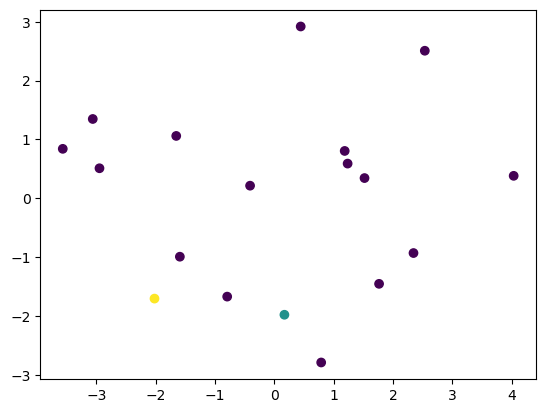

In [55]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=df_encoded_no_na['fighter1_result'])

### Neural Network: Deep Learning with Keras & Tensorflow??